# Importing packages and defining the DataFrame

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl

In [4]:
df=pd.read_excel(r"C:\Users\nadav\OneDrive\Desktop\Python\traffic_project\initial_data\traffic_violations.xlsx", sheet_name='Sheet1',engine='openpyxl')

In [5]:
df.dtypes

date_of_stop               datetime64[ns]
time_of_stop                       object
agency                             object
subagency                          object
description                        object
location                           object
latitude                          float64
longitude                         float64
accident                             bool
belts                                bool
personal_injury                      bool
property_damage                      bool
fatal                                bool
commercial_license                   bool
hazmat                               bool
commercial_vehicle                   bool
alcohol                              bool
work_zone                            bool
state                              object
vehicletype                        object
year                              float64
make                               object
model                              object
color                             

Understanding and cleaning the DF

In [6]:
df.sample(5)

,date_of_stop,time_of_stop,agency,subagency,description,location,latitude,longitude,accident,belts,...,charge,article,contributed_to_accident,race,gender,driver_city,driver_state,dl_state,arrest_type,geolocation
367486,2012-01-10,14:30:00,MCP,"2nd district, Bethesda",DRIVER FAILURE TO STOP AT STOP SIGN LINE,LELAND ST / OAKRIDGE LA,38.984453,-77.084554,False,False,...,21-707(a),Transportation Article,False,WHITE,F,ROCKVILLE,MD,MD,A - Marked Patrol,"(38.98445285, -77.0845537666667)"
899510,2014-05-26,16:02:00,MCP,"4th district, Wheaton",DRIVER USING HANDS TO USE HANDHELD TELEPHONE W...,REEDIE DRIVE / GEORGIA AVENUE,39.039042,-77.050265,False,False,...,21-1124.2(d2),Transportation Article,False,HISPANIC,M,SILVER SPRING,MD,MD,A - Marked Patrol,"(39.0390416666667, -77.050265)"
146350,2016-10-20,23:17:00,MCP,Headquarters and Special Operations,FAILURE OF DR. TO MAKE LANE CHANGE TO AVAIL. L...,N/B FREDERICK RD @ COLLEGE PKWY,39.104437,-77.156555,False,False,...,21-405(e1),Transportation Article,False,ASIAN,M,POTOMAC,MD,MD,A - Marked Patrol,"(39.1044366666667, -77.156555)"
293136,2015-05-15,02:15:00,MCP,"3rd district, Silver Spring",FAILURE TO ATTACH TEMP. REG. PLATE TO REAR OF ...,COLESVILLE ROAD/ SLIGO CREEK PKWY,39.006940,-77.020943,False,False,...,13-604(c),Transportation Article,False,BLACK,M,BURTONSVILLE,MD,MD,A - Marked Patrol,"(39.00694, -77.0209433333333)"
458930,2012-03-19,01:11:00,MCP,"1st district, Rockville",NEGLIGENT DRIVING VEHICLE IN CARELESS AND IMPR...,SCHUYLKILL DR / GARRETT PARK RD,38.997504,-77.109693,False,False,...,21-901.1(b),Transportation Article,False,HISPANIC,M,SILVER SPRING,MD,XX,A - Marked Patrol,"(38.9975037, -77.109693)"


In [7]:
print(df.dtypes)
print(df.shape)


date_of_stop               datetime64[ns]
time_of_stop                       object
agency                             object
subagency                          object
description                        object
location                           object
latitude                          float64
longitude                         float64
accident                             bool
belts                                bool
personal_injury                      bool
property_damage                      bool
fatal                                bool
commercial_license                   bool
hazmat                               bool
commercial_vehicle                   bool
alcohol                              bool
work_zone                            bool
state                              object
vehicletype                        object
year                              float64
make                               object
model                              object
color                             

In [8]:
df.drop_duplicates(inplace= True)

In [9]:
df.isnull().sum()

date_of_stop                   0
time_of_stop                   0
agency                         0
subagency                      0
description                    9
location                       2
latitude                   86154
longitude                  86154
accident                       0
belts                          0
personal_injury                0
property_damage                0
fatal                          0
commercial_license             0
hazmat                         0
commercial_vehicle             0
alcohol                        0
work_zone                      0
state                         59
vehicletype                    0
year                        6557
make                          48
model                        170
color                      13801
violation_type                 0
charge                         0
article                    53448
contributed_to_accident        0
race                           0
gender                         0
driver_cit

In [10]:
df['violation_id']=df.index
df['district']=df['subagency'].str[0]

In [11]:
droplst=['agency', 'subagency']
df.drop(droplst, axis= 1, inplace= True)

# 1.	What is the distribution of traffic stops (Count) by Year, Quarter, Month, Day & time?
Check what the Peak Days/Hours are. How do these patterns vary by agency or subagency? Analyse seasonal patterns or trends in the data.


In [12]:
df['stop_year']=df['date_of_stop'].dt.year
df['stop_quarter']=df['date_of_stop'].dt.quarter
df['stop_year_month']=df['date_of_stop'].dt.strftime('%m/%Y')
df['stop_day_month']=df['date_of_stop'].dt.strftime('%d/%m')
df['stop_month']=df['date_of_stop'].dt.month
df['stop_day']=df['date_of_stop'].dt.day
df['stop_hour']=pd.to_datetime(df['time_of_stop'] ,format='%H:%M:%S').dt.hour
df['stop_weekday']=df['date_of_stop'].dt.weekday

df['stop_weekday_text']=np.where(df['stop_weekday']==0, 'Monday',
                                 np.where(df['stop_weekday']==1, 'Tuesday',
                                          np.where(df['stop_weekday']==2, 'Wednesday',
                                                   np.where(df['stop_weekday']==3, 'Thursday',
                                                            np.where(df['stop_weekday']==4, 'Friday',
                                                                     np.where(df['stop_weekday']==5, 'Saturday',
                                                                              np.where(df['stop_weekday']==6, 'Sunday','Error')))))))
df.sample(5)

,date_of_stop,time_of_stop,description,location,latitude,longitude,accident,belts,personal_injury,property_damage,...,district,stop_year,stop_quarter,stop_year_month,stop_day_month,stop_month,stop_day,stop_hour,stop_weekday,stop_weekday_text
66226,2015-10-25,02:41:00,DRIVER ENTERING INTERSECTION AT FLASHING RED T...,RIDGE ROAD AND 355,39.207463,-77.246663,False,False,False,False,...,5,2015,4,10/2015,25/10,10,25,2,6,Sunday
210990,2015-09-01,13:20:00,DRIVER USING HANDS TO USE HANDHELD TELEPHONE W...,355/MARINELLI RD,38.984912,-77.093983,False,False,False,False,...,2,2015,3,09/2015,01/09,9,1,13,1,Tuesday
590476,2015-02-14,10:47:00,UNSAFE BACKING OF MOTOR VEH.,PARKING LOT GERMANTOWN TARGET,39.198668,-77.249815,False,False,False,False,...,5,2015,1,02/2015,14/02,2,14,10,5,Saturday
740927,2016-05-14,01:25:00,RECKLESS DRIVING VEHICLE IN WANTON AND WILLFUL...,W/B MD 200 @ NEW HAMPSHIRE AVE,39.043050,-76.988502,False,False,False,False,...,3,2016,2,05/2016,14/05,5,14,1,5,Saturday
191383,2013-04-26,01:23:00,DRIVER ENTERING INTERSECTION AT FLASHING RED T...,EAST GUDE DRIVE & SOUTHLAWN LANE,39.095965,-77.134224,False,False,False,False,...,1,2013,2,04/2013,26/04,4,26,1,4,Friday


In [13]:
df[df['stop_weekday_text']=='Error']

,date_of_stop,time_of_stop,description,location,latitude,longitude,accident,belts,personal_injury,property_damage,...,district,stop_year,stop_quarter,stop_year_month,stop_day_month,stop_month,stop_day,stop_hour,stop_weekday,stop_weekday_text


In [14]:
df[['stop_year','stop_month']][df['stop_year']==2017].drop_duplicates()
#when looking at the numbers, we should note that 2017 only has 3 months of data, giving months 1-3 (qtr 1) a larger sample

,stop_year,stop_month
49,2017,1
138,2017,2
188285,2017,3


In [15]:
df_month_count=df[['stop_month','stop_year']].drop_duplicates().groupby('stop_month')['stop_year'].count().reset_index().rename(columns={'stop_year':'years_count'})
df=pd.merge(df,
        df_month_count,
        how='left',
        on='stop_month')

In [16]:
df.groupby('stop_year_month')['violation_id'].count().reset_index().sort_values(by='violation_id', ascending= False).head(10)

,stop_year_month,violation_id
25,05/2014,22564
16,03/2016,22497
21,04/2015,21410
20,04/2014,21370
41,08/2015,21299
22,04/2016,20974
26,05/2015,20861
15,03/2015,20753
50,10/2014,20130
32,06/2016,20027


In [17]:
df.groupby('stop_quarter')['violation_id'].count().reset_index().sort_values(by='violation_id', ascending= False).rename(columns={'violation_id':'violation_count'})

,stop_quarter,violation_count
1,2,272907
0,1,267117
2,3,254206
3,4,252999


In [18]:
print('\ntraffic stops by year')
print(df['stop_year'].value_counts())

print('\ntraffic stops by quarter')
print(df['stop_quarter'][df['stop_year']!=2017].value_counts())

print('\ntraffic stops by month')
print(df['stop_month'][df['stop_year']!=2017].value_counts())

print('\ntraffic stops by day of the month')
print(df['stop_day'].value_counts())

print('\ntraffic stops by weekday')
print(df['stop_weekday'].value_counts())

print('\ntraffic stops by hour')
print(df['stop_hour'].value_counts())
#2017 excluded where relevant in order to not give months 1-3 and quarter 1 an 'advantage'


traffic stops by year
stop_year
2015    235113
2014    223419
2016    219353
2013    190239
2012    151142
2017     27963
Name: count, dtype: int64

traffic stops by quarter
stop_quarter
2    272907
3    254206
4    252999
1    239154
Name: count, dtype: int64

traffic stops by month
stop_month
5     97889
4     91725
3     90256
10    87371
8     85727
11    85596
9     84896
7     83583
6     83293
12    80032
2     75242
1     73656
Name: count, dtype: int64

traffic stops by day of the month
stop_day
8     36756
5     36612
10    36421
20    36097
16    35771
17    35609
9     35546
6     35353
18    35273
14    35185
7     35120
4     35059
12    34649
13    34646
11    34529
19    34370
22    34366
3     34308
27    34079
15    33965
1     33915
2     33199
21    32785
23    32698
26    32459
25    32391
24    32309
28    32126
30    30263
29    30144
31    21226
Name: count, dtype: int64

traffic stops by weekday
stop_weekday
1    180240
2    168897
4    166400
3    161663
0   

In [19]:
df.groupby('district')['violation_id'].count().reset_index().sort_values(by='violation_id', ascending= False)

,district,violation_id
3,4,256829
2,3,217624
1,2,153646
5,6,140966
0,1,123065
4,5,118495
6,H,36604


In [20]:
df.groupby(['district', 'stop_year'])['violation_id'].count().reset_index().sort_values(by='violation_id', ascending= False).head(10)

,district,stop_year,violation_id
21,4,2015,60066
22,4,2016,60004
20,4,2014,54261
14,3,2014,46714
15,3,2015,46563
13,3,2013,45814
16,3,2016,43014
19,4,2013,41425
8,2,2014,34960
9,2,2015,33203


In [21]:
df.groupby(['district', 'stop_year_month'])['violation_id'].count().reset_index().sort_values(by='violation_id', ascending= False).head(20)
#We can see that district 4 is by far the most active district, with 19 out of the top 20 months in terms of violations count

,district,stop_year_month,violation_id
203,4,03/2016,5884
208,4,04/2015,5879
242,4,11/2014,5665
202,4,03/2015,5520
197,4,02/2016,5415
228,4,08/2015,5364
213,4,05/2015,5348
209,4,04/2016,5344
214,4,05/2016,5303
243,4,11/2015,5253


In [22]:
df.groupby('date_of_stop')['violation_id'].count().reset_index().sort_values(by='violation_id', ascending= False)

,date_of_stop,violation_id
1171,2015-03-17,1278
870,2014-05-20,1222
1423,2015-11-24,1169
1850,2017-01-25,1166
1437,2015-12-08,1149
...,...,...
1483,2016-01-24,10
1878,2017-03-31,3
1877,2017-03-25,2
1875,2017-02-22,1


In [23]:
bins=[-1, 3, 6, 11, 13, 17, 21, np.inf]
bin_labels=['late night', 'early morning', 'morning', 'noon', 'afternoon', 'evening', 'early night']
df['stop_hour_bins']=pd.cut(df['stop_hour'], bins, labels=bin_labels)
df[['stop_hour','stop_hour_bins']].drop_duplicates().sort_values(by='stop_hour')

,stop_hour,stop_hour_bins
171,0,late night
58,1,late night
16,2,late night
1,3,late night
196,4,early morning
266,5,early morning
0,6,early morning
48,7,morning
30,8,morning
15,9,morning


In [24]:
df.groupby('stop_hour_bins')['violation_id'].count().reset_index()\
    .sort_values(by='violation_id', ascending= False).rename(columns={'violation_id':'violations_count'})
#We can see that most violations are in the morning, but it is worth noting that night is divided in 2 parts which is heavily affecting this list 

,stop_hour_bins,violations_count
2,morning,245386
4,afternoon,183128
5,evening,175600
0,late night,162208
6,early night,157215
3,noon,84120
1,early morning,39572


In [25]:
df.groupby(['stop_hour_bins', 'district'])['violation_id'].count().reset_index()\
    .sort_values(by='violation_id', ascending= False).rename(columns={'violation_id':'violations_count'}).head(10)

,stop_hour_bins,district,violations_count
17,morning,4,59584
31,afternoon,4,48963
38,evening,4,48042
16,morning,3,44999
19,morning,6,41043
15,morning,2,38422
45,early night,4,37255
30,afternoon,3,36756
2,late night,3,36661
37,evening,3,36583


In [26]:
df.groupby('stop_weekday')['violation_id'].count().reset_index()\
    .sort_values(by='violation_id', ascending= False).rename(columns={'violation_id':'violations_count'})
#According to the data, Tuesday is the day with the most violations, could be because it's the middle of the week and the police are most active
# but more data is needed in order to verify.

,stop_weekday,violations_count
1,1,180240
2,2,168897
4,4,166400
3,3,161663
0,0,141061
5,5,121330
6,6,107638


In [27]:
df.groupby(['stop_weekday', 'district'])['violation_id'].count().reset_index()\
    .sort_values(by='violation_id', ascending= False).rename(columns={'violation_id':'violations_count'}).head(10)

,stop_weekday,district,violations_count
10,1,4,42346
31,4,4,40269
17,2,4,38950
3,0,4,38276
24,3,4,35500
30,4,3,35468
9,1,3,34049
16,2,3,33419
38,5,4,32396
23,3,3,32213


Text(0.5, 1.0, 'Count of violations by time of day')

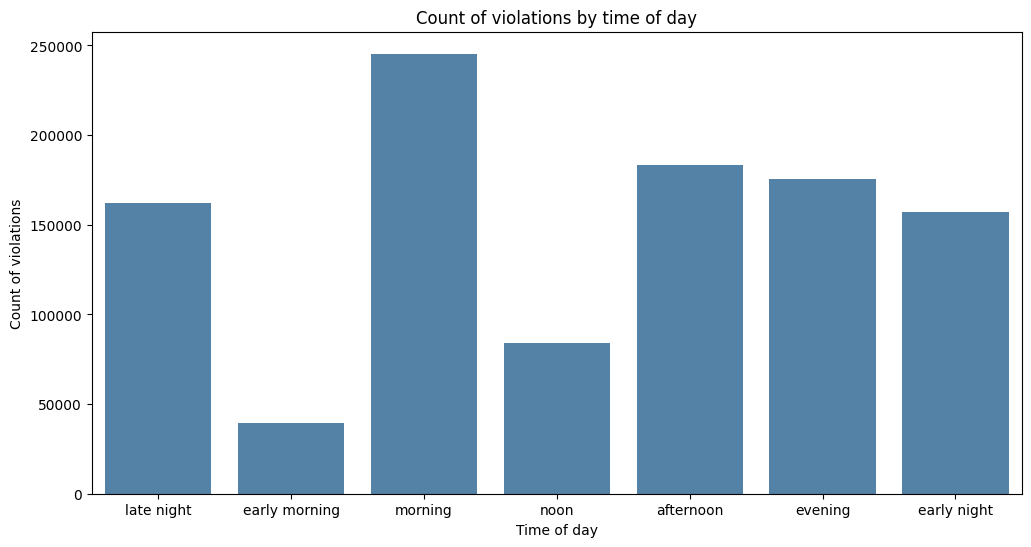

In [28]:
plt.figure(figsize=(12,6))

sns.barplot(df.groupby('stop_hour_bins')['violation_id'].count().reset_index().sort_values(by='violation_id', ascending= False),\
             x='stop_hour_bins', y='violation_id', color='steelblue')

plt.ylabel('Count of violations')
plt.xlabel('Time of day')
plt.title('Count of violations by time of day')


Text(0.5, 1.0, 'Count of violations by time of day')

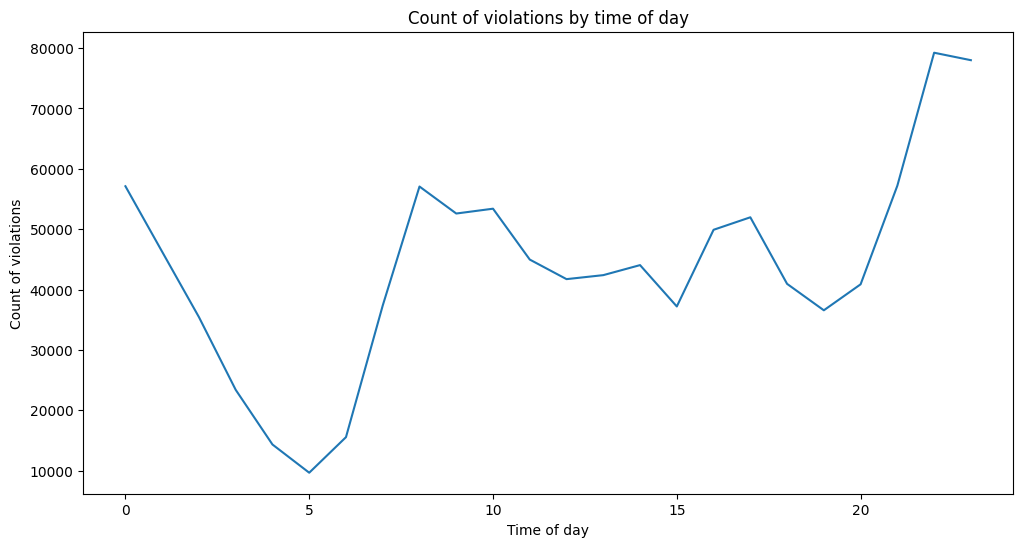

In [29]:
plt.figure(figsize=(12,6))

sns.lineplot(df.groupby('stop_hour')['violation_id'].count().reset_index().sort_values(by='violation_id', ascending= False),\
             x='stop_hour', y='violation_id')

plt.ylabel('Count of violations')
plt.xlabel('Time of day')
plt.title('Count of violations by time of day')

Text(0.5, 1.0, 'Count of violations by year')

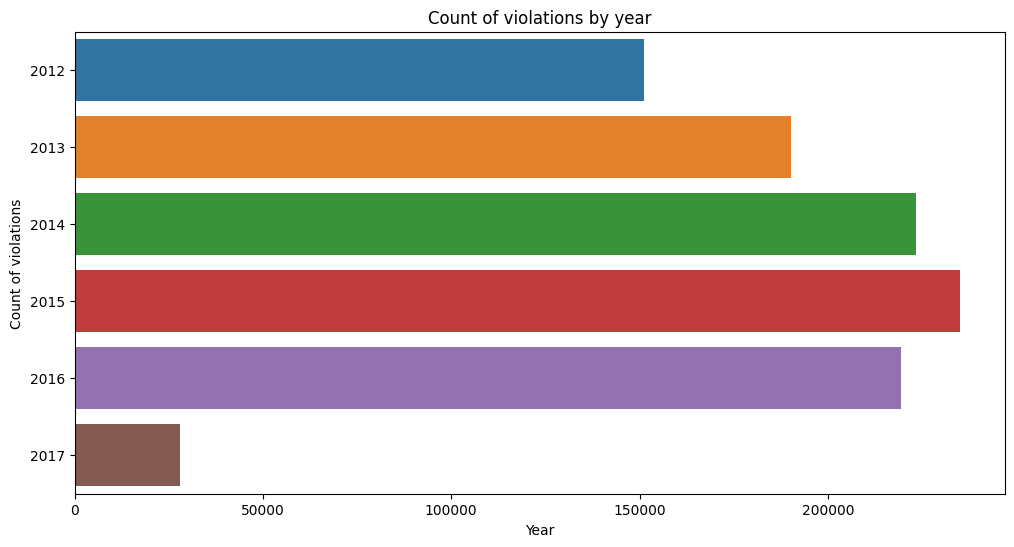

In [30]:
plt.figure(figsize=(12,6))

sns.barplot(orient= 'h' ,data= df.groupby('stop_year')['violation_id'].count().reset_index().sort_values(by='violation_id', ascending= False),\
             y='stop_year', x='violation_id')

plt.ylabel('Count of violations')
plt.xlabel('Year')
plt.title('Count of violations by year')

In [31]:
df_day_count=pd.DataFrame(df['stop_day'].value_counts().reset_index())
df_weekday_count=pd.DataFrame(df['stop_weekday'].value_counts().reset_index())

<Axes: xlabel='stop_weekday', ylabel='count'>

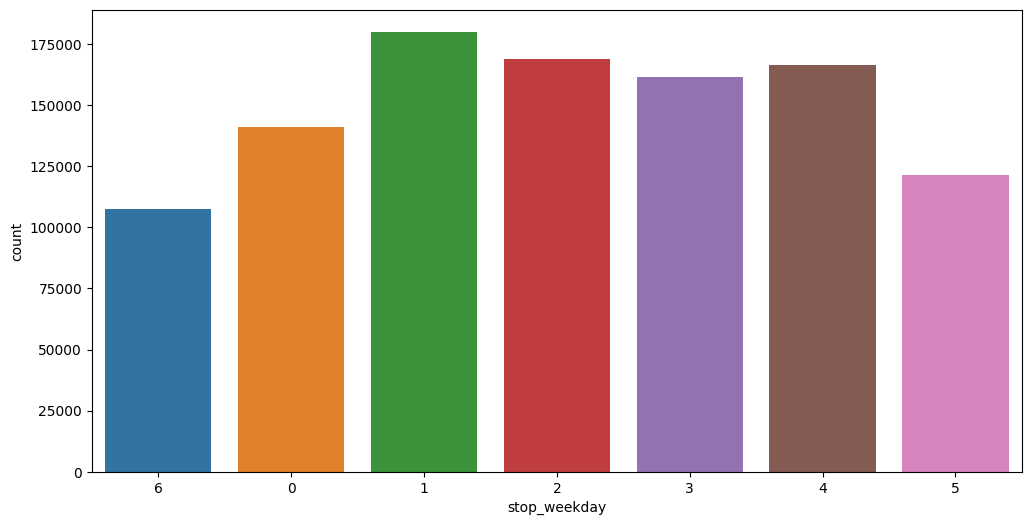

In [32]:
plt.figure(figsize=(12,6))
sns.barplot(data=df_weekday_count, x='stop_weekday', y='count', order=(6,0,1,2,3,4,5))

# 2.	What is the distribution of traffic stops (Count) by City &Location?
Check how many accidents happened with Vehicle Type,
Analyse patterns or trends in the data.


In [33]:
df.columns

Index(['date_of_stop', 'time_of_stop', 'description', 'location', 'latitude',
       'longitude', 'accident', 'belts', 'personal_injury', 'property_damage',
       'fatal', 'commercial_license', 'hazmat', 'commercial_vehicle',
       'alcohol', 'work_zone', 'state', 'vehicletype', 'year', 'make', 'model',
       'color', 'violation_type', 'charge', 'article',
       'contributed_to_accident', 'race', 'gender', 'driver_city',
       'driver_state', 'dl_state', 'arrest_type', 'geolocation',
       'violation_id', 'district', 'stop_year', 'stop_quarter',
       'stop_year_month', 'stop_day_month', 'stop_month', 'stop_day',
       'stop_hour', 'stop_weekday', 'stop_weekday_text', 'years_count',
       'stop_hour_bins'],
      dtype='object')

In [34]:
df.groupby('location')['violation_id'].count().reset_index().sort_values(by='violation_id', ascending= False)

,location,violation_id
71984,IS 370 @ IS 270,1952
148580,W/B IS 370 @ IS 270,1882
150904,WAYNE AVE @ DALE DR,1587
109389,RANDOLPH / COLIE,1494
1423,10901 WESTLAKE DRIVE,1437
...,...,...
53533,FERERA DR/ FERERA AVE,1
113116,RIFFLEFORD @ RT 118,1
113117,RIFFLEFORD AND MONARCH VISTA,1
113118,RIFFLEFORD RD,1


In [35]:
df_city_location=df.groupby(['driver_city', 'location'])['violation_id'].count().reset_index().sort_values(by='violation_id', ascending= False)

In [36]:
df_city_location[df_city_location['violation_id']>10]

,driver_city,location,violation_id
314061,SILVER SPRING,WAYNE AVE @ DALE DR,815
126076,GERMANTOWN,CLOPPER RD E/B @ ORCHARD HILLS DR,790
300087,SILVER SPRING,RANDOLPH / COLIE,553
120457,GAITHERSBURG,WOODFIELD RD @ EMORY GROVE RD,533
104409,GAITHERSBURG,IS 370 @ IS 270,469
...,...,...,...
37393,BROOKEVILLE,EAST BOUND 2 BRIGHTON DAM RD,11
286932,SILVER SPRING,GREENTREE RD @ EWING DR,11
101220,GAITHERSBURG,FLOWER HILL RD/WOODFIELD RD,11
97929,GAITHERSBURG,CLOPPER@CINNAMON,11


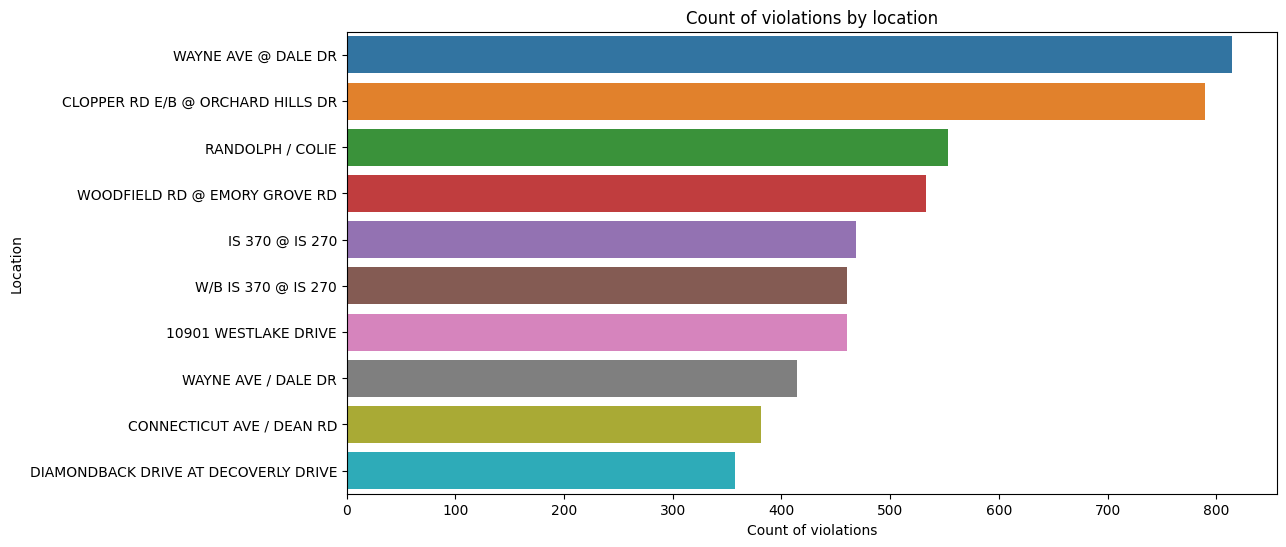

In [37]:
plt.figure(figsize=(12,6))

sns.barplot(orient='h',data=df_city_location.head(10), x='violation_id', y='location')

plt.ylabel('Location')
plt.xlabel('Count of violations')
plt.title('Count of violations by location')
plt.show()

In [38]:
df_city=df.groupby('driver_city')['violation_id'].count().reset_index().sort_values(by='violation_id', ascending= False).rename(columns={'violation_id':'violations_count'}).head(10)
df_state=df.groupby('state')['violation_id'].count().reset_index().sort_values(by='violation_id', ascending= False).rename(columns={'violation_id':'violations_count'})

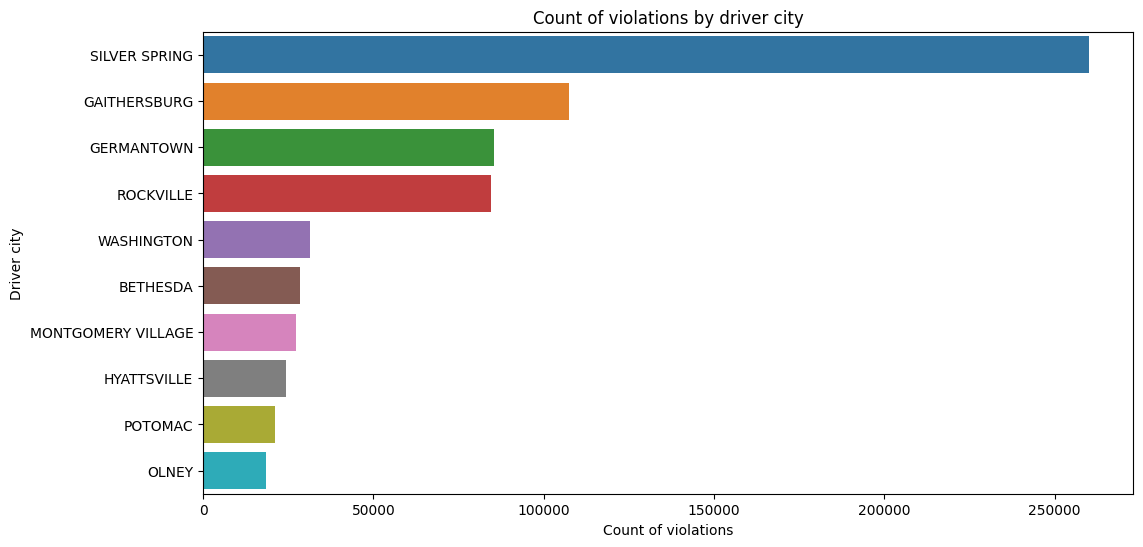

In [39]:
plt.figure(figsize=(12,6))

sns.barplot(orient='h',data=df_city, x='violations_count', y='driver_city')

plt.ylabel('Driver city')
plt.xlabel('Count of violations')
plt.title('Count of violations by driver city')
plt.show()

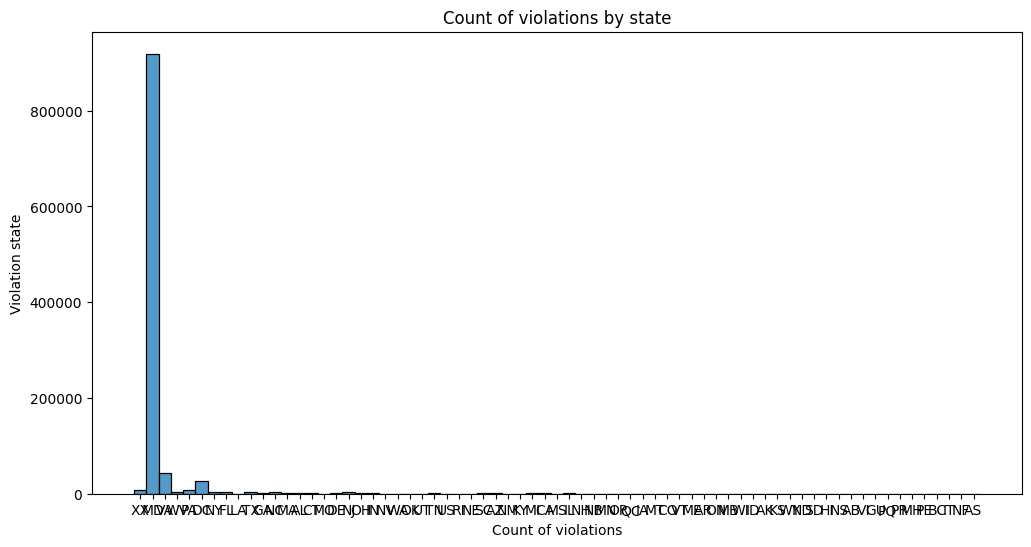

In [40]:
plt.figure(figsize=(12,6))

sns.histplot(data=df['state'])

plt.ylabel('Violation state')
plt.xlabel('Count of violations')
plt.title('Count of violations by state')
plt.show()

# 3.	Show the average age of vehicles involved in traffic stops/violations by Vehicle Type
Analyse patterns or trends in the data. That could inform the department about vehicle safety and emissions standards.


In [41]:
#Had to do a lot of searching for this, but in violation types, SERO- Safety Equipment Repair Order and ESERO- Electric Safety Equipment Repair Order

In [42]:
df['state'][df['year']<2020].value_counts()

state
MD    918471
VA     42647
DC     26010
PA      7503
FL      4600
       ...  
PE         2
NF         2
MH         1
IT         1
AS         1
Name: count, Length: 69, dtype: int64

In [43]:
df['vehicle_age']= (df['stop_year'] - df['year'])

In [44]:
#df['violation_type'].value_counts()
df['violation_type']=np.where(df['violation_type']=='ESERO', 'SERO', df['violation_type'])
df['violation_type'].value_counts()

violation_type
Citation    509968
Warning     483833
SERO         53428
Name: count, dtype: int64

In [45]:
df[['year','stop_year','vehicle_age']].sort_values(by='vehicle_age')

,year,stop_year,vehicle_age
23,9999.0,2012,-7987.0
21,9999.0,2012,-7987.0
20,9999.0,2012,-7987.0
13,9999.0,2012,-7987.0
19,9999.0,2013,-7986.0
...,...,...,...
1047224,NaN,2017,NaN
1047225,NaN,2017,NaN
1047226,NaN,2017,NaN
1047227,NaN,2017,NaN


In [46]:
df[df['year']<1982]['violation_id'].count()

1832

In [47]:
regular_year_mean=df['year'][df['year'].between(1982,2017)]
min_normal_year=1982
max_normal_year=2017
#1982 picked because it's the first year with triple digit vehicle counts and below that the numbers become irrelevant and don't really make sense,
#there's 1832 violations before that which are some irrelevant compared to the over 1 million total violations
# 2014 picked because it's the final relevant year for the dataset
violations_between_years=df['violation_id'][df['year'].between(min_normal_year,max_normal_year)].count()
print((round(violations_between_years/df['violation_id'].count(), 3))*100, '%')
#Over 99% of all violations are between these years, so i'll remove any records with years not in this range which shouldn't affect the dataset at all

99.1 %


In [48]:
print(len(df[df['vehicle_age']<0]))
df=df[df['vehicle_age']>0]
#Removing 3417 more rows where vehicle age doesn't make sense, again very small sample compared to the total amount of rows

3936


In [49]:
df=df[df['year'].between(min_normal_year, max_normal_year)]

In [50]:
df_violations=df.groupby('violation_type')['vehicle_age'].mean().reset_index()
df_violations

,violation_type,vehicle_age
0,Citation,9.423668
1,SERO,11.062944
2,Warning,8.996534


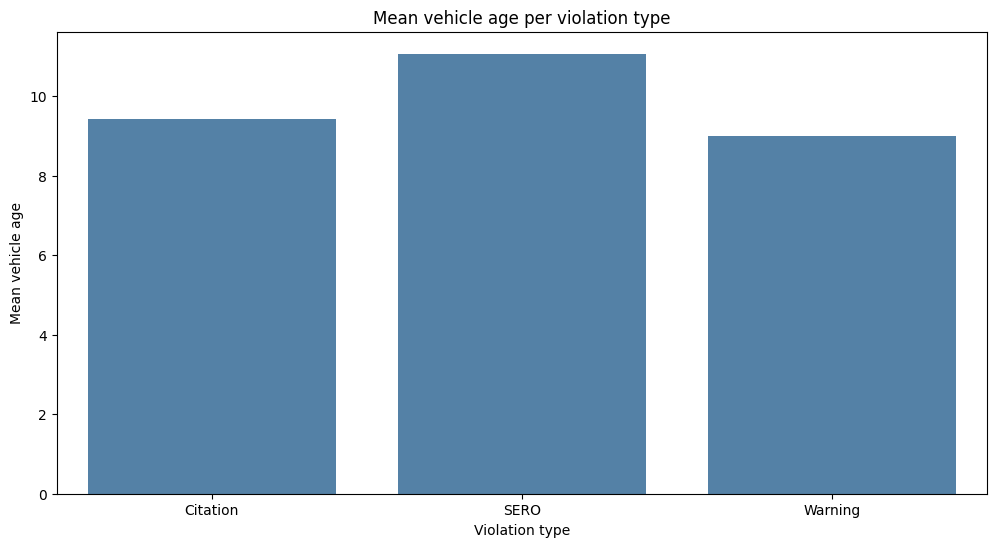

In [51]:
plt.figure(figsize=(12,6))

sns.barplot(orient='v',data=df_violations, x='violation_type', y='vehicle_age', color='steelblue')

plt.ylabel('Mean vehicle age')
plt.xlabel('Violation type')
plt.title('Mean vehicle age per violation type')
plt.show()

In [52]:
df_vehicle_type=df.groupby('vehicletype')['vehicle_age'].agg(('mean','count')).reset_index().sort_values(by='count', ascending= False)
df_vehicle_type

,vehicletype,mean,count
1,02 - Automobile,9.325935,868788
4,05 - Light Duty Truck,9.529643,59238
29,28 - Other,8.334358,19521
2,03 - Station Wagon,8.701814,16815
5,06 - Heavy Duty Truck,11.074992,9601
0,01 - Motorcycle,9.093592,9520
7,08 - Recreational Vehicle,7.658974,3293
26,25 - Utility Trailer,10.379406,1078
6,07 - Truck/Road Tractor,10.383708,933
20,19 - Moped,4.888753,818


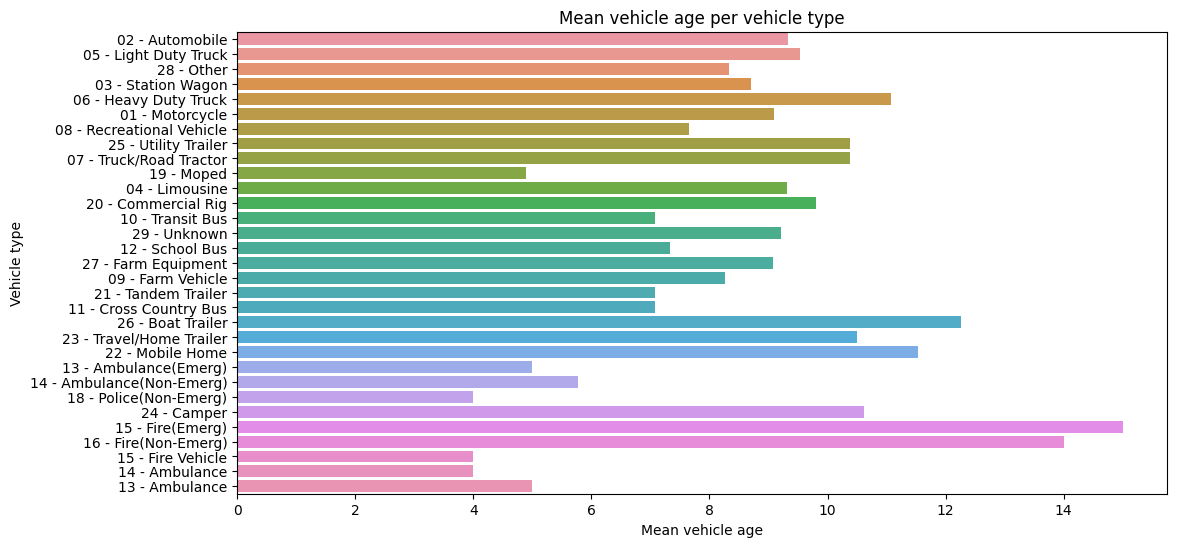

In [53]:

plt.figure(figsize=(12,6))

sns.barplot(orient='h', data=df_vehicle_type, y='vehicletype', x='mean')

plt.xlabel('Mean vehicle age')
plt.ylabel('Vehicle type')
plt.title('Mean vehicle age per vehicle type')
plt.show()

In [54]:
age_bins=[-1,5,10,15,20,30,np.inf]
age_bin_labels=['0-5','6-10','11-15','16-20','21-30','30+']
df['vehicle_age_bins']=pd.cut(df['vehicle_age'], age_bins, labels=age_bin_labels)

In [55]:
df_vehicle_bins=df.groupby(['vehicle_age_bins', 'violation_type'])['violation_id'].count().reset_index()

In [56]:
df_vehicle_bins

,vehicle_age_bins,violation_type,violation_id
0,0-5,Citation,133826
1,0-5,SERO,7802
2,0-5,Warning,138712
3,6-10,Citation,150356
4,6-10,SERO,17306
5,6-10,Warning,146710
6,11-15,Citation,130206
7,11-15,SERO,17902
8,11-15,Warning,115363
9,16-20,Citation,54222


In [57]:
df_SERO=df_vehicle_bins[['vehicle_age_bins','violation_id']][df_vehicle_bins['violation_type']=='SERO']

In [58]:
total_SERO=df_SERO['violation_id'].sum()
total_violations=df['violation_id'].count()

In [59]:
df.groupby('vehicle_age_bins')['violation_id'].count().reset_index().rename(columns={'violation_id':'count_of_total'})

,vehicle_age_bins,count_of_total
0,0-5,280340
1,6-10,314372
2,11-15,263471
3,16-20,106231
4,21-30,27083
5,30+,471


In [60]:
df_SERO['%_of_total_SERO']= (df_SERO['violation_id'] / total_SERO)*100
df_SERO['%_of_total_violations']= (df_SERO['violation_id'] / total_violations)*100
df_SERO=pd.merge(df_SERO,
                 df.groupby('vehicle_age_bins')['violation_id'].count().reset_index().rename(columns={'violation_id':'count_of_total'}),
                 how='left',
                 on='vehicle_age_bins')


In [61]:
df_SERO['%_of_total_age_violations']= (df_SERO['violation_id'] /df_SERO['count_of_total'])*100
df_SERO

,vehicle_age_bins,violation_id,%_of_total_SERO,%_of_total_violations,count_of_total,%_of_total_age_violations
0,0-5,7802,14.729648,0.786517,280340,2.783049
1,6-10,17306,32.672557,1.744613,314372,5.504943
2,11-15,17902,33.797765,1.804695,263471,6.794676
3,16-20,7777,14.682450,0.783997,106231,7.320839
4,21-30,2158,4.074158,0.217547,27083,7.968098
5,30+,23,0.043422,0.002319,471,4.883227


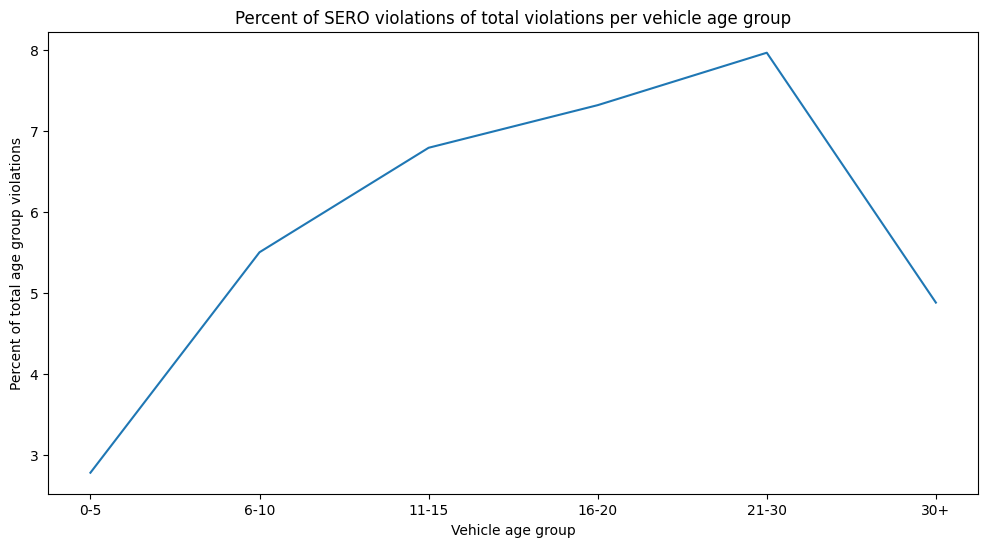

In [62]:

plt.figure(figsize=(12,6))

sns.lineplot(data=df_SERO, x='vehicle_age_bins', y='%_of_total_age_violations')

plt.title('Percent of SERO violations of total violations per vehicle age group')
plt.xlabel('Vehicle age group')
plt.ylabel('Percent of total age group violations')
plt.show()
# We can see a steady increase in the percent of total violations being Safety Equipment Repair Orders as the vehicle gets older,
# apart from a somewhat significant drop in the 30+ group which could be attributed to the small sample size

# 4.	Identify correlations of alcohol or drug-related traffic stops/violations, and identify distribution by location or time of day?

In [63]:
df_alcohol=df[['stop_hour_bins','alcohol']][df['alcohol']== True]
df_alcohol=df_alcohol.groupby('stop_hour_bins')['alcohol'].count().reset_index().sort_values(by='alcohol', ascending= False)
total_alcohol_violations=df_alcohol['alcohol'].sum()
df_alcohol['%_of_total']= (df_alcohol['alcohol'] / total_alcohol_violations)*100

In [64]:
df_alcohol=pd.merge(df_alcohol,
                    df.groupby('stop_hour_bins')['violation_id'].count().reset_index()\
                        .sort_values(by='violation_id', ascending= False).rename(columns={'violation_id':'count_of_total'}),
                    how='left',
                    on='stop_hour_bins')


In [65]:
df_alcohol['%_of_total_bin_violations']=(df_alcohol['alcohol'] / df_alcohol['count_of_total'])*100
df_alcohol

,stop_hour_bins,alcohol,%_of_total,count_of_total,%_of_total_bin_violations
0,afternoon,560,28.970512,172613,0.324425
1,morning,498,25.763063,230784,0.215786
2,evening,385,19.917227,167833,0.229395
3,late night,168,8.691154,153947,0.109128
4,noon,132,6.828764,78764,0.167589
5,early morning,95,4.914640,37462,0.253590
6,early night,95,4.914640,150565,0.063096


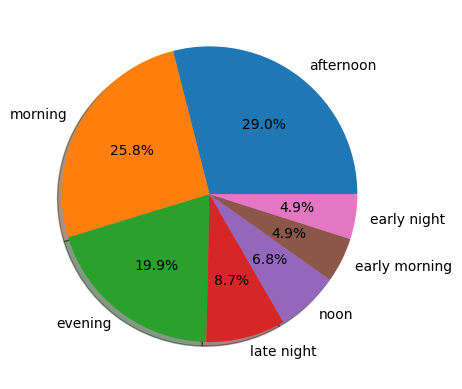

In [66]:
plt.pie(data=df_alcohol, x='alcohol', labels='stop_hour_bins', shadow= True,autopct='%1.1f%%')
plt.show()

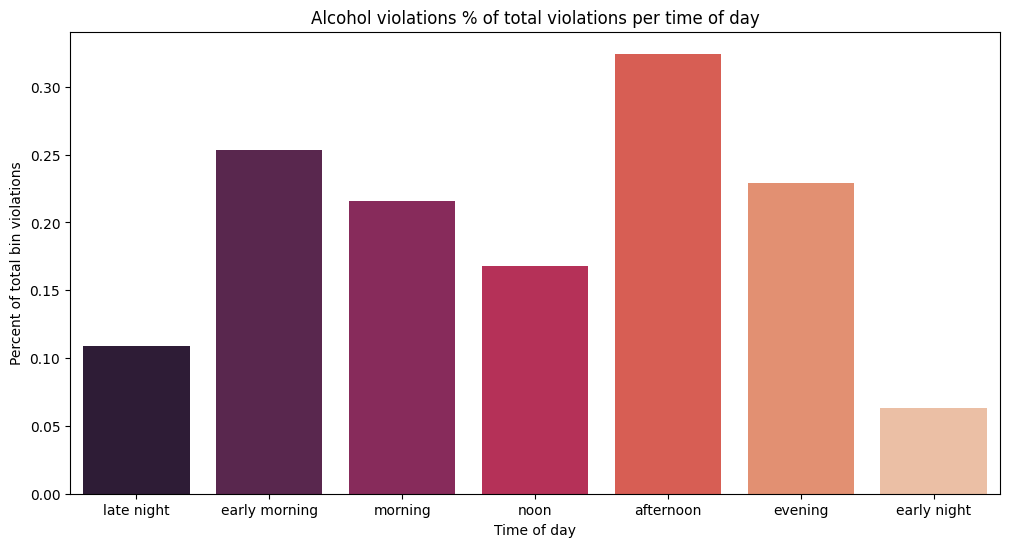

In [67]:
plt.figure(figsize=(12,6))

sns.barplot(data= df_alcohol, x='stop_hour_bins', y='%_of_total_bin_violations', palette='rocket')

plt.ylabel('Percent of total bin violations')
plt.xlabel('Time of day')
plt.title('Alcohol violations % of total violations per time of day')
plt.show()

# 5.	Identify the pattern and relation b/w the location of a traffic stop and the driver's race, gender?
Identify areas - State/City/Location that is more likely to result in citations or arrests.


In [68]:
df_5=df[['violation_id', 'gender','race','violation_type','contributed_to_accident','location']]

In [69]:
df_location_gender=df_5.groupby(['location','gender'])['violation_id'].count().reset_index().sort_values(by='violation_id', ascending= False)

In [70]:
df_location_gender

,location,gender,violation_id
87011,IS 370 @ IS 270,M,1127
183055,WAYNE AVE @ DALE DR,M,1044
180233,W/B IS 370 @ IS 270,M,985
132471,RANDOLPH / COLIE,M,846
189771,WOODFIELD RD @ EMORY GROVE RD,M,732
...,...,...,...
62145,FALLS RD @ WOOTTON,M,1
62146,FALLS RD @ WOOTTON PKW,M,1
62149,FALLS RD @ WOTTON PKWY,M,1
133956,RANDOLPH RD/DALEWOOD DRIVE,M,1


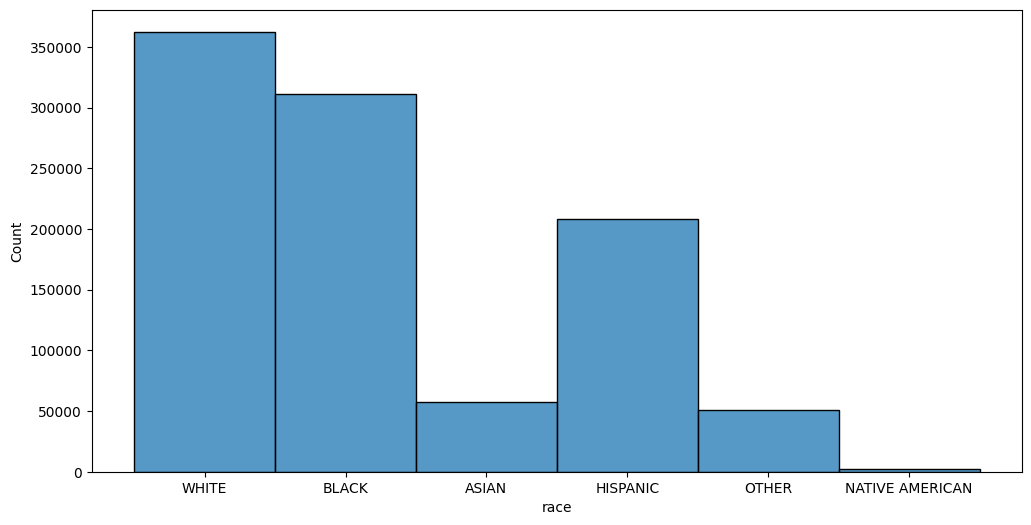

In [71]:
plt.figure(figsize=(12,6))

sns.histplot(data= df_5['race'])
plt.show()

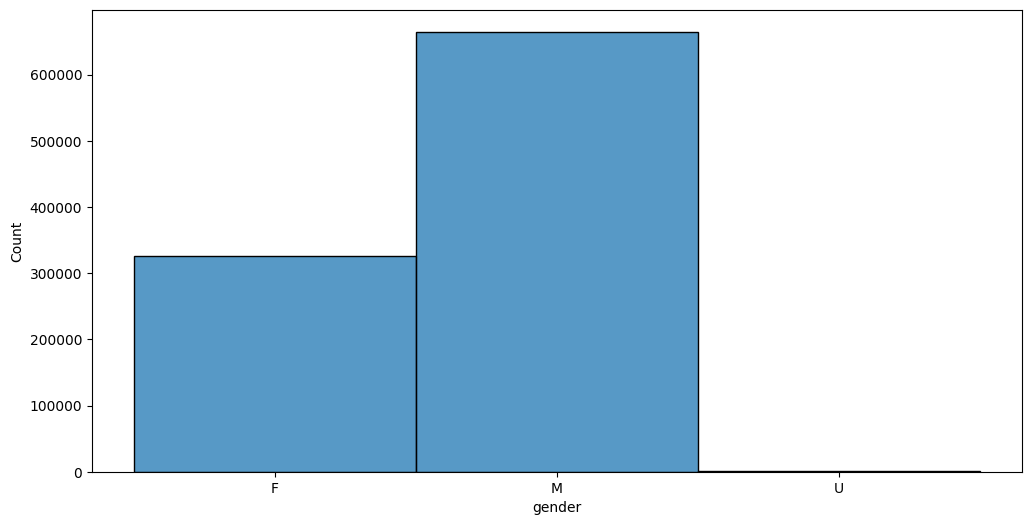

In [72]:
plt.figure(figsize=(12,6))

sns.histplot(data= df_5['gender'])
plt.show()

In [73]:
df_location_gender.rename({'violation_id':'location_violations'}, axis=1, inplace= True)
df_location_gender

,location,gender,location_violations
87011,IS 370 @ IS 270,M,1127
183055,WAYNE AVE @ DALE DR,M,1044
180233,W/B IS 370 @ IS 270,M,985
132471,RANDOLPH / COLIE,M,846
189771,WOODFIELD RD @ EMORY GROVE RD,M,732
...,...,...,...
62145,FALLS RD @ WOOTTON,M,1
62146,FALLS RD @ WOOTTON PKW,M,1
62149,FALLS RD @ WOTTON PKWY,M,1
133956,RANDOLPH RD/DALEWOOD DRIVE,M,1


In [74]:
top_10_locations=df_5.groupby('location')['violation_id'].count().reset_index().sort_values(by='violation_id', ascending= False).head(10)
top_10_locations=list(top_10_locations['location'])
top_10_locations

['IS 370 @ IS 270',
 'W/B IS 370 @ IS 270',
 'WAYNE AVE @ DALE DR',
 'RANDOLPH / COLIE',
 '10901 WESTLAKE DRIVE',
 'RT 28 @ BLACKBERRY DR',
 'CLOPPER RD E/B @ ORCHARD HILLS DR',
 'WOODFIELD RD @ EMORY GROVE RD',
 'WB RT.198 @ SANTINI ROAD',
 'RIDGE RD @ OBSERVATION DR']

In [75]:
df_top_10=df_5[df_5['location'].isin(top_10_locations)]

In [76]:
male_percent=(df_top_10['gender'][df_top_10['gender']=='M'].count() / df_top_10['gender'].count())*100
female_percent= (100 - male_percent)
print(male_percent, female_percent)


60.7880496913345 39.2119503086655


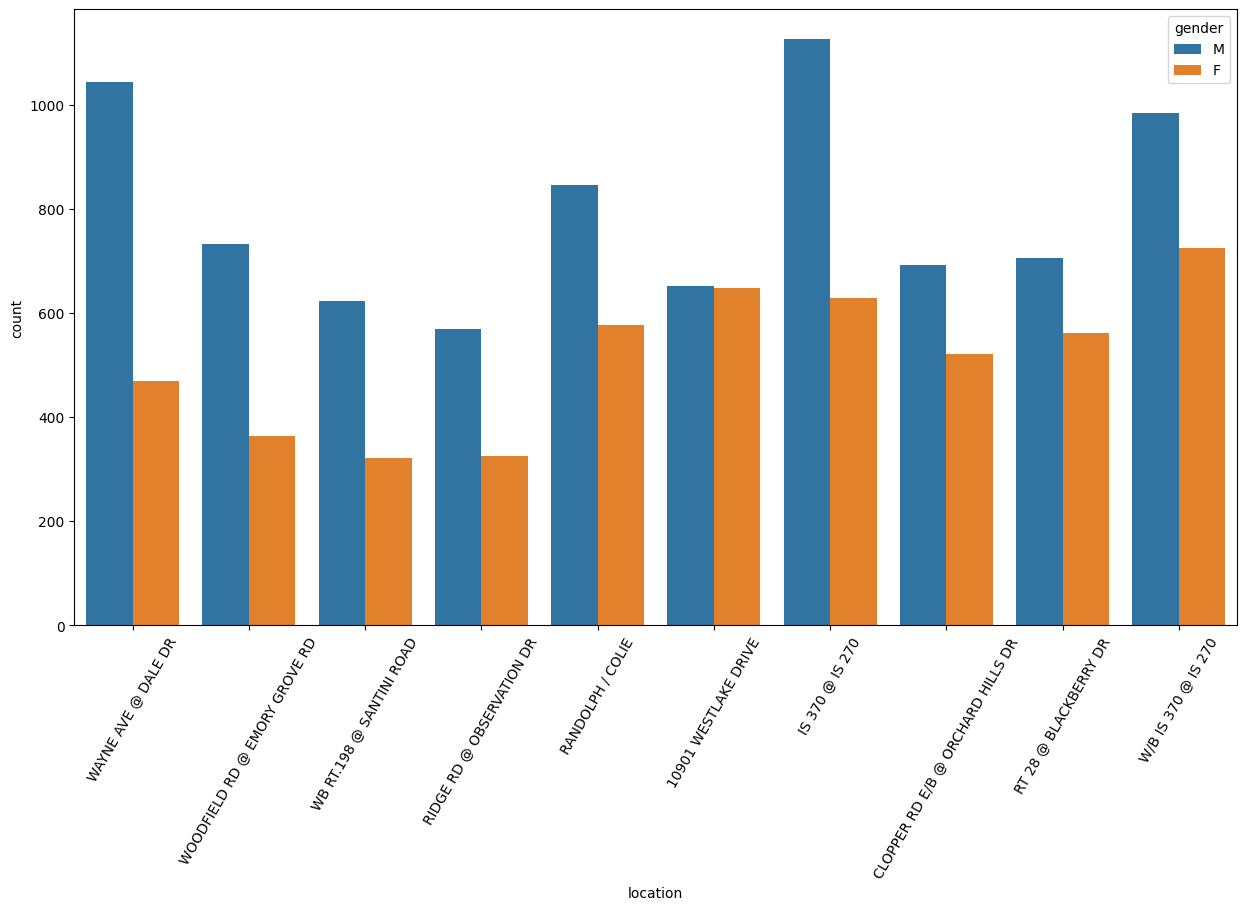

In [77]:
plt.figure(figsize=(15,8))

sns.countplot(data=df_top_10, x='location', hue='gender')
plt.xticks(rotation=60)
plt.show()

In [78]:
df_top_10['race'].drop_duplicates()

12750              BLACK
13477              WHITE
13839           HISPANIC
20456              OTHER
20502              ASIAN
74770    NATIVE AMERICAN
Name: race, dtype: object

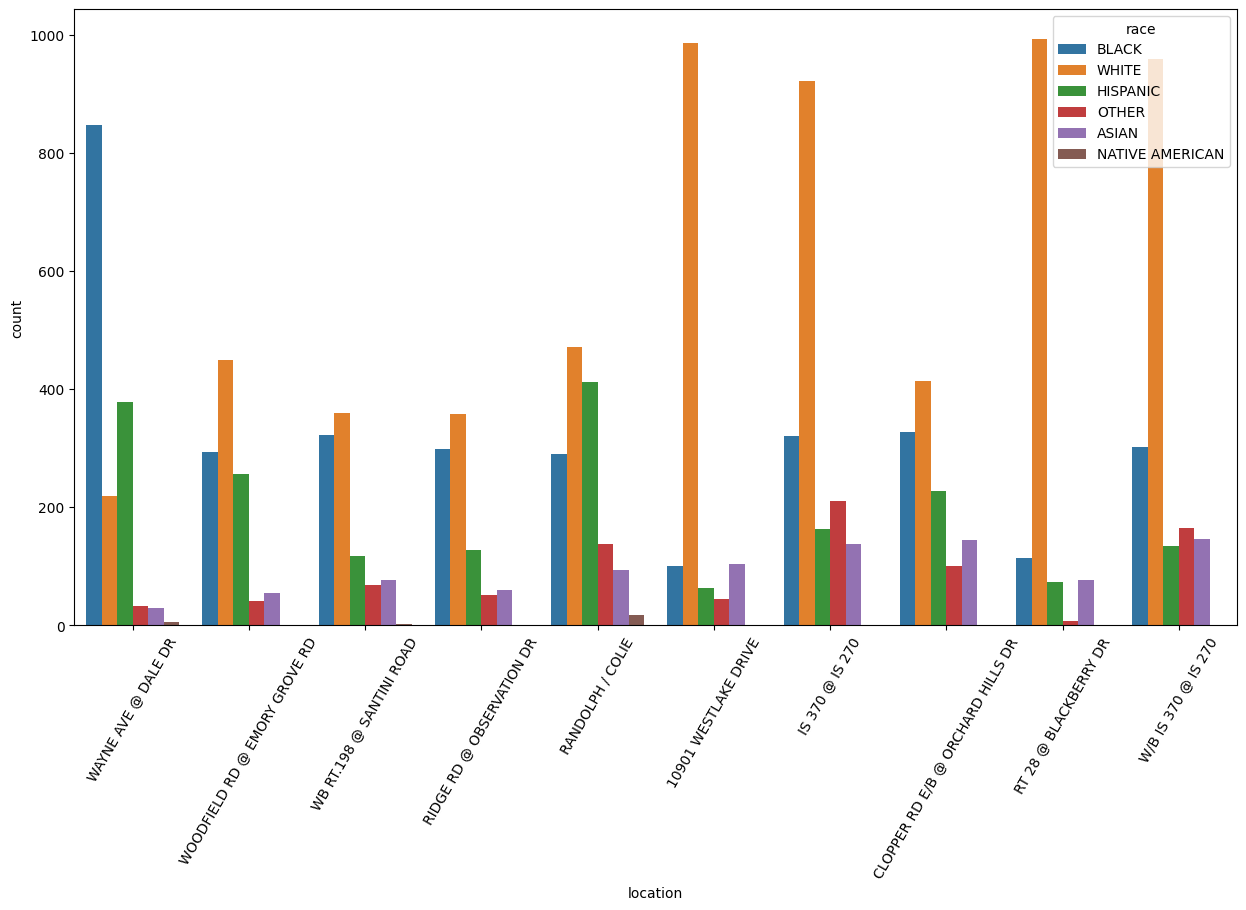

In [79]:
plt.figure(figsize=(15,8))

sns.countplot(data=df_top_10, x='location', hue='race')
plt.xticks(rotation=60)
plt.show()

# 6.	Identify the distribution of traffic stops by agency and subagency. Analyse if there are any disparities in the outcomes of traffic stops/violations.

In [80]:
df_dist=df[['district', 'violation_type']]
df_dist

,district,violation_type
12062,2,Citation
12069,2,Citation
12089,2,Citation
12218,3,Citation
12219,3,Citation
...,...,...
1038835,H,SERO
1038836,H,SERO
1038837,H,SERO
1038838,H,SERO


In [81]:
df_dist_group=df_dist.groupby('district')['violation_type'].count().reset_index()

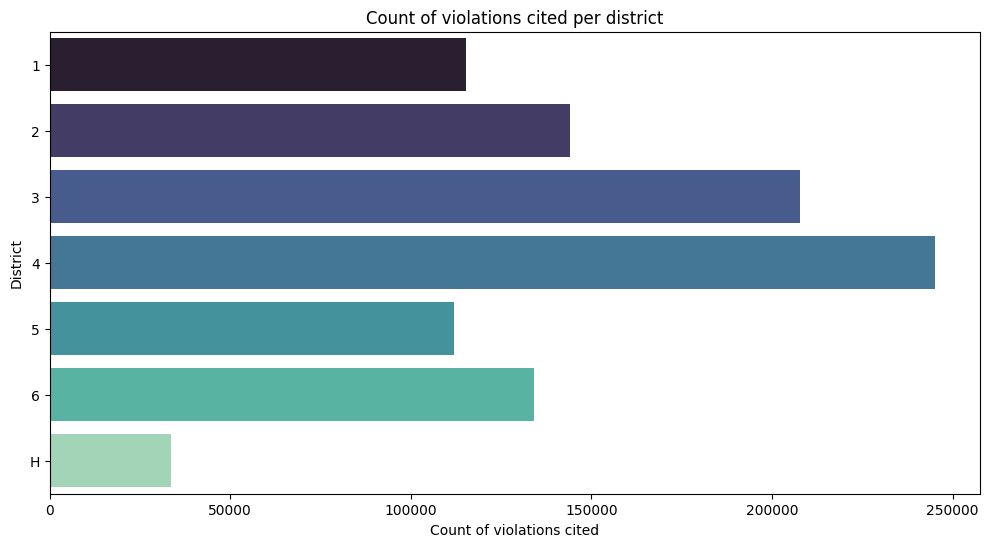

In [82]:
plt.figure(figsize=(12,6))
order={'1':1,'2':2,'3':3,'4':4,'5':5,'6':6,'H':7}

sns.barplot(orient='h', data=df_dist_group, y='district', x='violation_type',palette='mako', order=order)

plt.ylabel('District')
plt.xlabel('Count of violations cited')
plt.title('Count of violations cited per district')
plt.show()

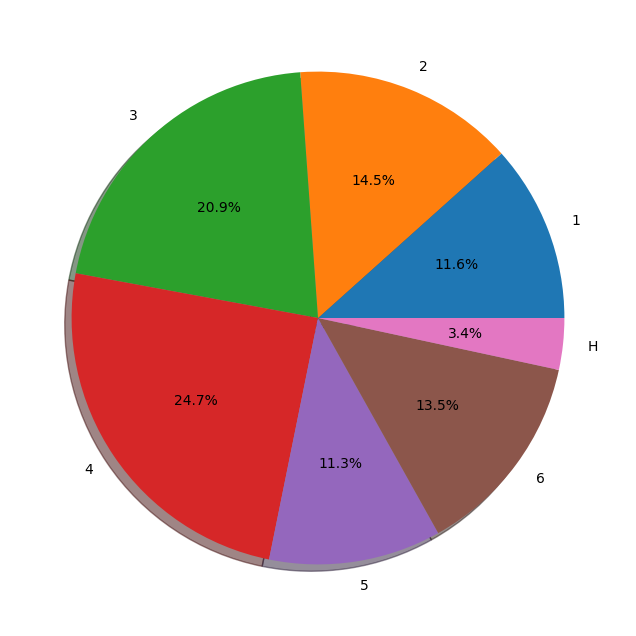

In [83]:
plt.figure(figsize=(8,8))

plt.pie(data=df_dist_group, x='violation_type', labels='district', shadow= True,autopct='%1.1f%%')
plt.show()

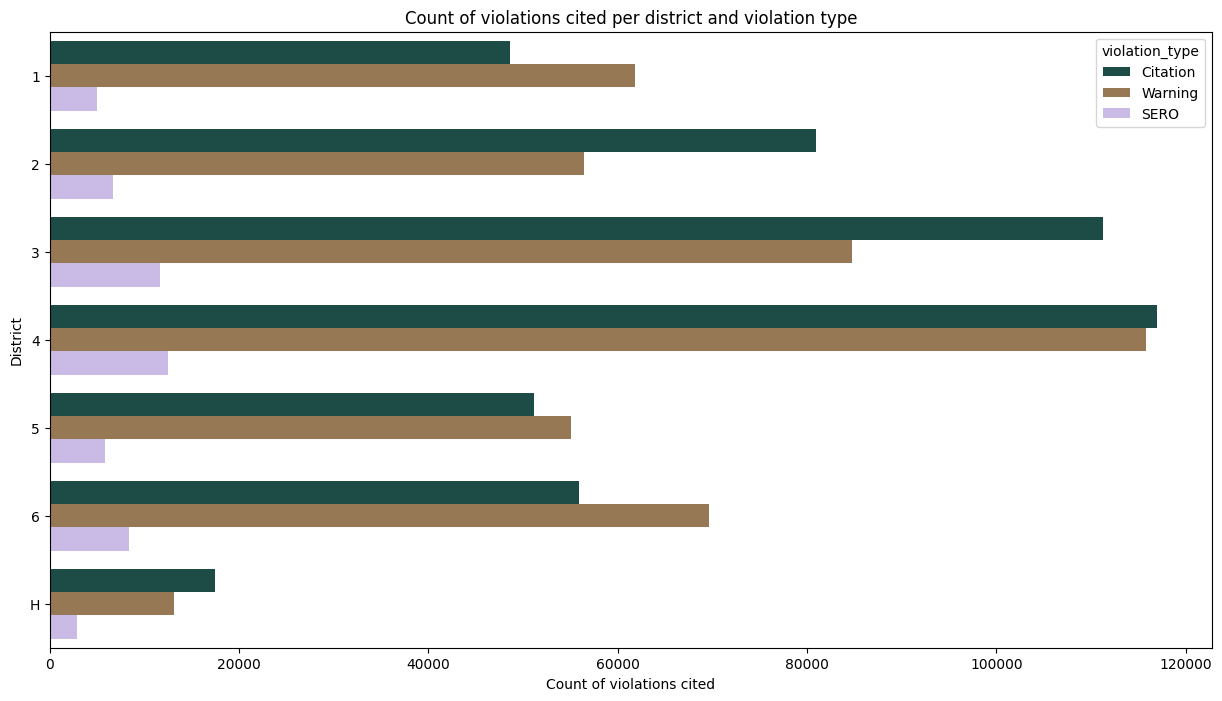

In [84]:
plt.figure(figsize=(15,8))
order={'1':1,'2':2,'3':3,'4':4,'5':5,'6':6,'H':7}

sns.countplot(orient='h', data=df_dist, y='district', hue='violation_type', palette='cubehelix', order=order)

plt.ylabel('District')
plt.xlabel('Count of violations cited')
plt.title('Count of violations cited per district and violation type')
plt.show()
# We can see that districts 2 and 3 give marginally less warnings and more citations than the other districts

# 7.	Identify the traffic stops/violations or workdays & weekends or Holidays (Example – New Year) by State/City/Location. Also identify correlations of alcohol or drug-related traffic stops/violations, by the time of day.

In [85]:
#In the stop_weekday column, 0 is for monday meaning days 5-6 are saturday and sunday aka the weekend
df['is_weekday_ind']=np.where(df['stop_weekday'].between(5,6), 'Weekend', 'Weekday')

In [86]:
df_drunk=df[['violation_id','stop_hour','stop_weekday_text','is_weekday_ind','location','driver_city','driver_state']][df['alcohol']==True]
df_drunk

,violation_id,stop_hour,stop_weekday_text,is_weekday_ind,location,driver_city,driver_state
15255,15269,17,Monday,Weekday,5353 WESTBARD AVE,TAKOMA PARK,MD
15266,15280,17,Monday,Weekday,5353 WESTBARD AVE,TAKOMA PARK,MD
15274,15288,17,Monday,Weekday,5353 WESTBARD AVE,TAKOMA PARK,MD
15280,15294,17,Monday,Weekday,5353 WESTBARD AVE,TAKOMA PARK,MD
15287,15301,17,Monday,Weekday,5353 WESTBARD AVE,TAKOMA PARK,MD
...,...,...,...,...,...,...,...
1034700,1036006,17,Sunday,Weekend,WHITES FERRY RD/WASCHE RD,POOLESVILLE,MD
1034701,1036007,17,Sunday,Weekend,WHITES FERRY RD/WASCHE RD,POOLESVILLE,MD
1034702,1036008,17,Sunday,Weekend,WHITES FERRY RD/WASCHE RD,POOLESVILLE,MD
1034703,1036009,17,Sunday,Weekend,WHITES FERRY RD/WASCHE RD,POOLESVILLE,MD


In [87]:
df_state_violations=df.groupby('driver_state')['violation_id'].count().reset_index().sort_values(by='violation_id', ascending= False)\
    .rename({'violation_id':'violation_count'}, axis=1)
df_state_violations

,driver_state,violation_count
25,MD,899554
9,DC,30059
58,VA,30040
46,PA,5109
11,FL,3282
...,...,...
56,US,2
13,GU,1
19,IT,1
39,NS,1


In [88]:
df.columns

Index(['date_of_stop', 'time_of_stop', 'description', 'location', 'latitude',
       'longitude', 'accident', 'belts', 'personal_injury', 'property_damage',
       'fatal', 'commercial_license', 'hazmat', 'commercial_vehicle',
       'alcohol', 'work_zone', 'state', 'vehicletype', 'year', 'make', 'model',
       'color', 'violation_type', 'charge', 'article',
       'contributed_to_accident', 'race', 'gender', 'driver_city',
       'driver_state', 'dl_state', 'arrest_type', 'geolocation',
       'violation_id', 'district', 'stop_year', 'stop_quarter',
       'stop_year_month', 'stop_day_month', 'stop_month', 'stop_day',
       'stop_hour', 'stop_weekday', 'stop_weekday_text', 'years_count',
       'stop_hour_bins', 'vehicle_age', 'vehicle_age_bins', 'is_weekday_ind'],
      dtype='object')

In [89]:
df_drunk_state=df_drunk.groupby('driver_state')['violation_id'].count().reset_index().sort_values(by='violation_id', ascending= False).head(10)
df_drunk_state=pd.merge(df_drunk_state,
                        df_state_violations,
                        how='left',
                        on='driver_state')
df_drunk_state['percent_of_total_violations']= (df_drunk_state['violation_id'] / df_drunk_state['violation_count'])*100
df_drunk_state

,driver_state,violation_id,violation_count,percent_of_total_violations
0,MD,1869,899554,0.207770
1,VA,33,30040,0.109854
2,DC,20,30059,0.066536
3,MO,8,268,2.985075
4,FL,3,3282,0.091408


<Axes: xlabel='driver_state', ylabel='percent_of_total_violations'>

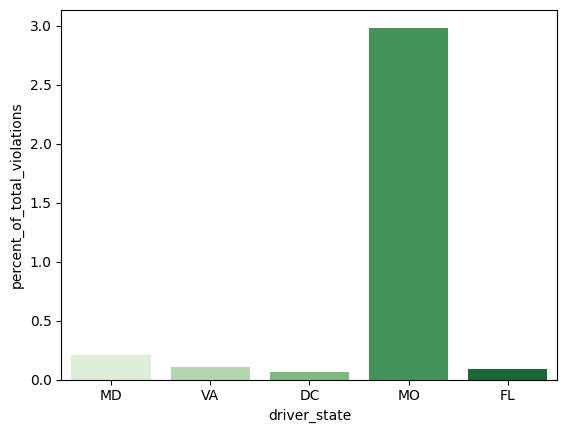

In [90]:
sns.barplot(data=df_drunk_state, x='driver_state', y='percent_of_total_violations', palette='Greens')

In [91]:
df_drunk_days=df_drunk.groupby('stop_weekday_text')['violation_id'].count().reset_index().rename({'violation_id':'drunk_violations_count'}, axis= 1)


In [92]:
df_drunk_days=pd.merge(df_drunk_days,
                       df.groupby('stop_weekday_text')['violation_id'].count().reset_index().rename({'violation_id':'total_violations_count'}, axis= 1),
                       how='left',
                       on='stop_weekday_text')


In [93]:
df_drunk_days['percent_of_total_violations']=(df_drunk_days['drunk_violations_count'] / df_drunk_days['total_violations_count'])*100
df_drunk_days=df_drunk_days.sort_values(by='percent_of_total_violations', ascending= False)

In [94]:
df_drunk_days

,stop_weekday_text,drunk_violations_count,total_violations_count,percent_of_total_violations
1,Monday,348,133705,0.260274
4,Thursday,341,152656,0.223378
6,Wednesday,341,159621,0.213631
5,Tuesday,336,170685,0.196854
0,Friday,274,157288,0.174203
2,Saturday,194,115549,0.167894
3,Sunday,99,102464,0.096619


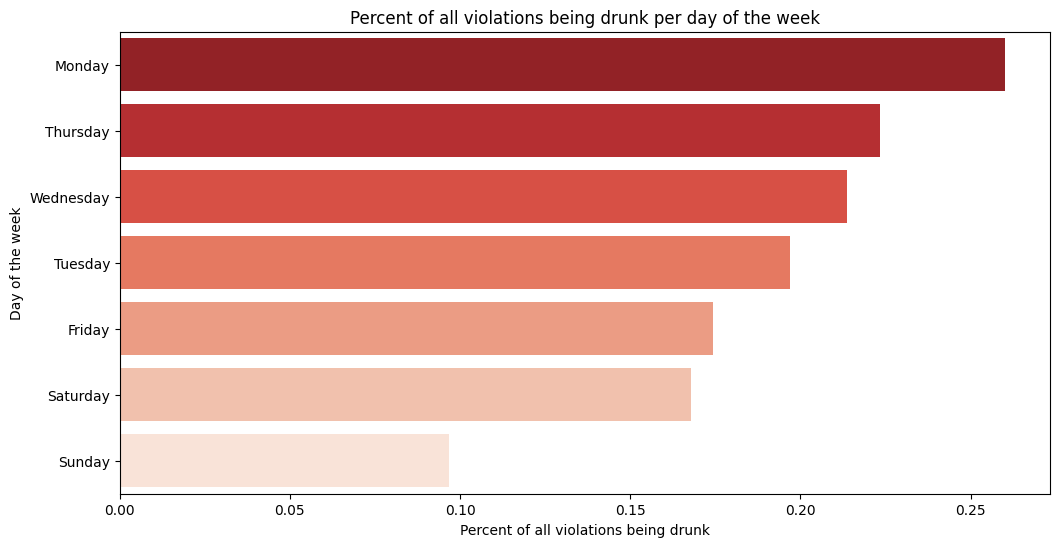

In [95]:
plt.figure(figsize=(12,6))

sns.barplot(data=df_drunk_days,orient='h', x='percent_of_total_violations', y='stop_weekday_text', palette='Reds_r')

plt.ylabel('Day of the week')
plt.xlabel('Percent of all violations being drunk')
plt.title('Percent of all violations being drunk per day of the week')
plt.show()

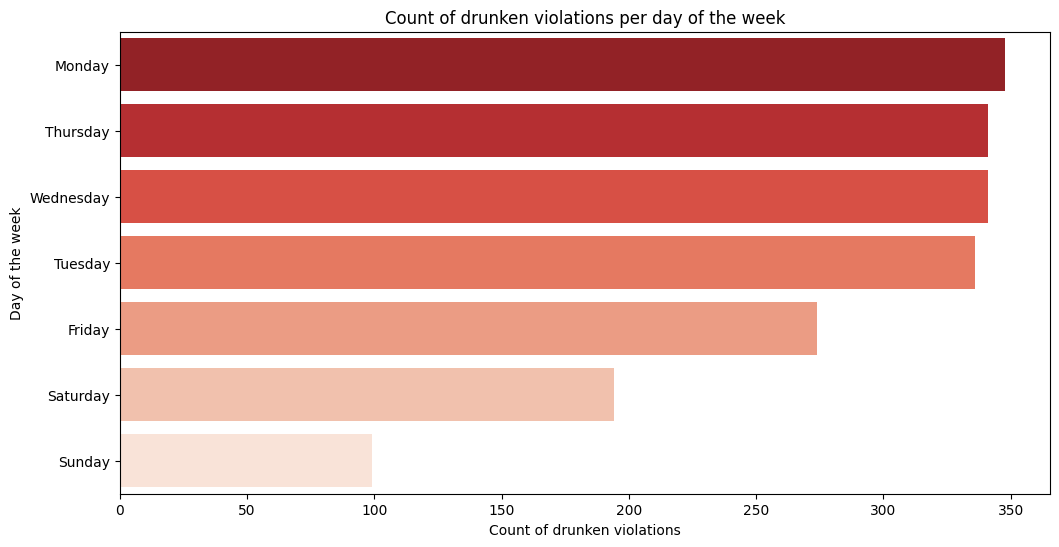

In [96]:
plt.figure(figsize=(12,6))

sns.barplot(data=df_drunk_days,orient='h', x='drunk_violations_count', y='stop_weekday_text', palette='Reds_r')

plt.ylabel('Day of the week')
plt.xlabel('Count of drunken violations')
plt.title('Count of drunken violations per day of the week')
plt.show()

# 8.	Out of the Total violations identify the % distribution by State/City/Location where the driver is arrested or cited.

In [97]:
df['violation_type'].unique()
#There's no arrests in the file so not really sure what this is about

array(['Citation', 'Warning', 'SERO'], dtype=object)

In [98]:
df.columns

Index(['date_of_stop', 'time_of_stop', 'description', 'location', 'latitude',
       'longitude', 'accident', 'belts', 'personal_injury', 'property_damage',
       'fatal', 'commercial_license', 'hazmat', 'commercial_vehicle',
       'alcohol', 'work_zone', 'state', 'vehicletype', 'year', 'make', 'model',
       'color', 'violation_type', 'charge', 'article',
       'contributed_to_accident', 'race', 'gender', 'driver_city',
       'driver_state', 'dl_state', 'arrest_type', 'geolocation',
       'violation_id', 'district', 'stop_year', 'stop_quarter',
       'stop_year_month', 'stop_day_month', 'stop_month', 'stop_day',
       'stop_hour', 'stop_weekday', 'stop_weekday_text', 'years_count',
       'stop_hour_bins', 'vehicle_age', 'vehicle_age_bins', 'is_weekday_ind'],
      dtype='object')

In [99]:
df_citation=df[['violation_id','location','driver_city','driver_state']][df['violation_type']=='Citation']
df_citation_loc=df_citation.groupby(['location'])['violation_id'].count().reset_index().sort_values(by='violation_id', ascending= False)

In [100]:
top_10_loclist=list(df_citation_loc['location'].head(10))
df_citation['top_10']=np.where(df_citation['location'].isin(top_10_loclist), df_citation['location'], 'Other')

df_citation_loc=df_citation.groupby('top_10')['violation_id'].count().reset_index().sort_values(by='violation_id', ascending= False)
df_citation_loc

,top_10,violation_id
2,Other,475431
0,10901 WESTLAKE DRIVE,1221
9,WB RT.198 @ SANTINI ROAD,763
4,RT 28 @ BLACKBERRY DR,750
8,WAYNE AVE @ DALE DR,688
1,MONTROSE RD ON N/B I270,645
6,SHADY GROVE METRO EXIT @ SHADY GROVE RD,630
10,WOODFIELD RD @ EMORY GROVE RD,592
3,POOKS HILL RD AT LINDEN AV,556
7,W/B IS 370 @ IS 270,529


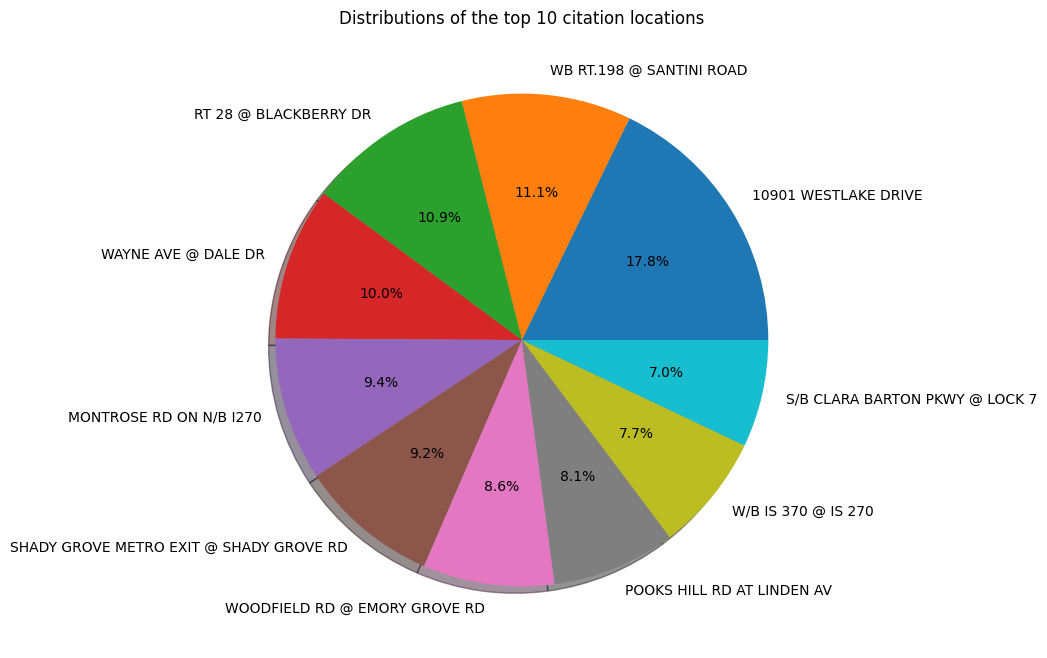

In [101]:
plt.figure(figsize=(8,8))

plt.pie(data=df_citation_loc[df_citation_loc['top_10']!='Other'], x='violation_id', labels='top_10', shadow= True,autopct='%1.1f%%')
plt.title('Distributions of the top 10 citation locations')
plt.show()

In [102]:
df_citation_city=df_citation.groupby(['driver_city'])['violation_id'].count().reset_index().sort_values(by='violation_id', ascending= False)

In [103]:
top_10_city=list(df_citation_city['driver_city'].head(10))
df_citation['top_10_city']=np.where(df_citation['driver_city'].isin(top_10_city), df_citation['driver_city'], 'Other')
df_citation_city=df_citation.groupby('top_10_city')['violation_id'].count().reset_index().sort_values(by='violation_id', ascending= False)

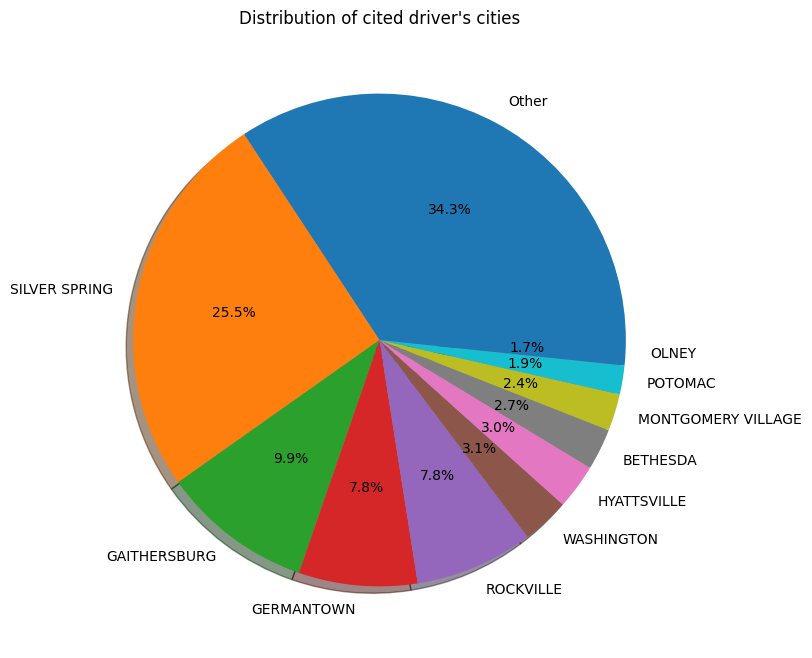

In [104]:
plt.figure(figsize=(8,8))

plt.pie(data=df_citation_city, x='violation_id', labels='top_10_city', shadow= True,autopct='%1.1f%%')
plt.title("Distribution of cited driver's cities")
plt.show()

# 9.	Identify if specific colors or vehicle models are likely to be involved in accidents?

In [105]:
df_accident=df[df['accident']==True]
df_accident=df[df['contributed_to_accident']==True]
#For some reason all values under accident are false... I'll use the contributed_to_accident column instead

In [106]:
df_accident_color=df_accident.groupby('color')['violation_id'].count().reset_index()\
    .sort_values(by='violation_id', ascending= False).rename({'violation_id':'total_accidents'}, axis=1)

In [107]:
df_accident_color=pd.merge(df_accident_color,
                           df.groupby('color')['violation_id'].count().reset_index()\
                            .sort_values(by='violation_id', ascending= False).rename({'violation_id':'total_violations'}, axis=1),
                           how='left',
                           on='color')


In [108]:
df_accident_color['percent_being_accidents']=(df_accident_color['total_accidents'] / df_accident_color['total_violations'])*100
df_accident_color.sort_values(by='percent_being_accidents', ascending= False, inplace= True)

In [109]:
from scipy.stats import zscore
df_accident_color['zscore']=zscore(df_accident_color['percent_being_accidents'])

In [110]:
df_accident_color.sort_values(by='zscore', ascending= False)

,color,total_accidents,total_violations,percent_being_accidents,zscore
17,MULTICOLOR,77,859,8.963912,4.229835
23,CHROME,1,22,4.545455,1.147072
15,YELLOW,150,3793,3.954653,0.734869
18,PURPLE,73,2112,3.456439,0.387265
16,BROWN,147,4763,3.086290,0.129011
14,"GREEN, LGT",179,6094,2.937315,0.025071
10,MAROON,516,17970,2.871452,-0.020881
20,BRONZE,66,2392,2.759197,-0.099202
6,GREEN,1152,42058,2.739075,-0.113241
12,"GREEN, DK",328,12220,2.684124,-0.151580


In [111]:
df_accident_color[~df_accident_color['zscore'].between(-1.5, 1.5)]


,color,total_accidents,total_violations,percent_being_accidents,zscore
17,MULTICOLOR,77,859,8.963912,4.229835


In [112]:
mean_percent=df_accident_color['percent_being_accidents'].mean()
median_percent=df_accident_color['percent_being_accidents'].median()

print('mean-', mean_percent, 'median-', median_percent)
df_accident_color[df_accident_color['percent_being_accidents']>mean_percent]

mean- 2.9013810441393644 median- 2.606292933311977


,color,total_accidents,total_violations,percent_being_accidents,zscore
17,MULTICOLOR,77,859,8.963912,4.229835
23,CHROME,1,22,4.545455,1.147072
15,YELLOW,150,3793,3.954653,0.734869
18,PURPLE,73,2112,3.456439,0.387265
16,BROWN,147,4763,3.086290,0.129011
14,"GREEN, LGT",179,6094,2.937315,0.025071


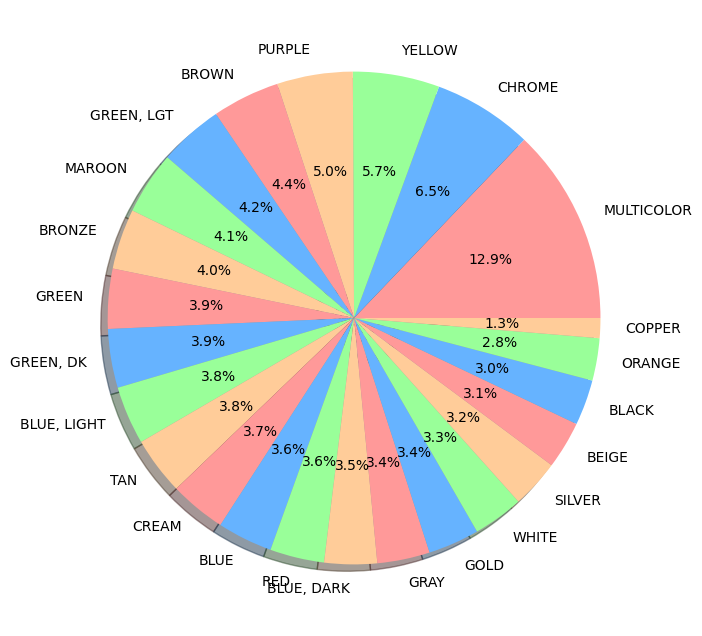

In [113]:
plt.figure(figsize=(8,8))
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
plt.pie(data=df_accident_color, x='percent_being_accidents', labels='color', shadow= True,autopct='%1.1f%%', colors=colors)
#plt.title("Distribution of cited driver's cities")
plt.show()

Doesn't really seem to be a huge contribution of color to the percent of total violations being accidents (not exactly a surprise), but looks like drivers who drive multi colored cars could be more dangerous than other, even way more dangerous.
Chrome cars also have a very high percentage, but the sample size is far too small, and infact they've only cintributed to 1 accident out of 22 violations total.

# 10.	What is the overall trend in the number of violations/traffic stops per year?

In [114]:
df_year_trend=df.groupby(['stop_year']).agg({'violation_id':'count','stop_month':'max'}).reset_index().rename({'violation_id':'count_of_stops'}, axis=1)

In [115]:
df_year_trend['stops_per_month']=df_year_trend['count_of_stops'] / df_year_trend['stop_month']
df_year_trend

,stop_year,count_of_stops,stop_month,stops_per_month
0,2012,143140,12,11928.333333
1,2013,180846,12,15070.500000
2,2014,212196,12,17683.000000
3,2015,221307,12,18442.250000
4,2016,207245,12,17270.416667
5,2017,27234,3,9078.000000


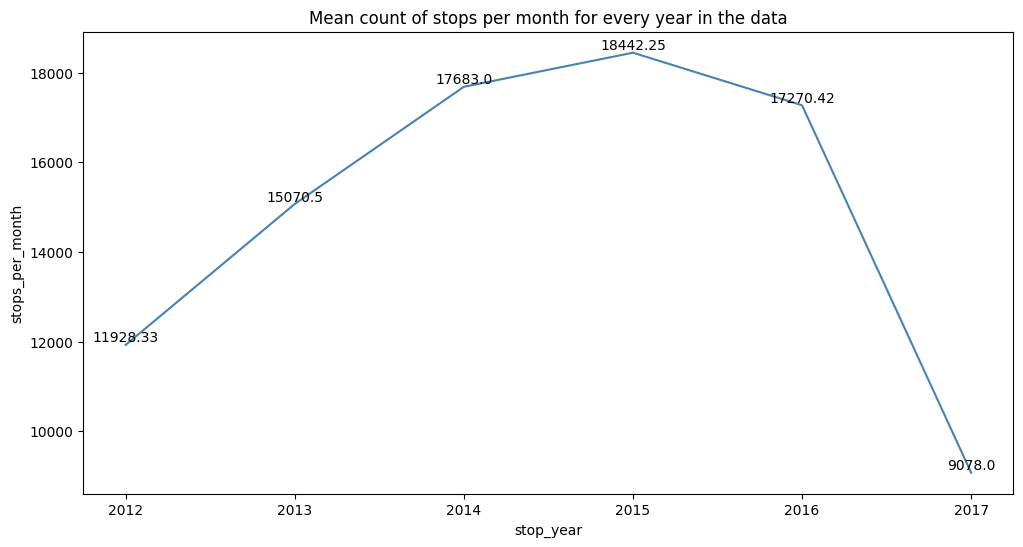

In [116]:
plt.figure(figsize=(12,6))

sns.lineplot(data=df_year_trend, x='stop_year', y='stops_per_month', color='steelblue')

for index, row in df_year_trend.iterrows():
    label = round(row['stops_per_month'], 2)
    plt.text(row['stop_year'], row['stops_per_month'], str(label), ha='center', va='bottom')

plt.title('Mean count of stops per month for every year in the data')
plt.show()

In [117]:
for index, row in df_year_trend.iterrows():
    print(row['stop_year'], row['stops_per_month'])

2012.0 11928.333333333334
2013.0 15070.5
2014.0 17683.0
2015.0 18442.25
2016.0 17270.416666666668
2017.0 9078.0


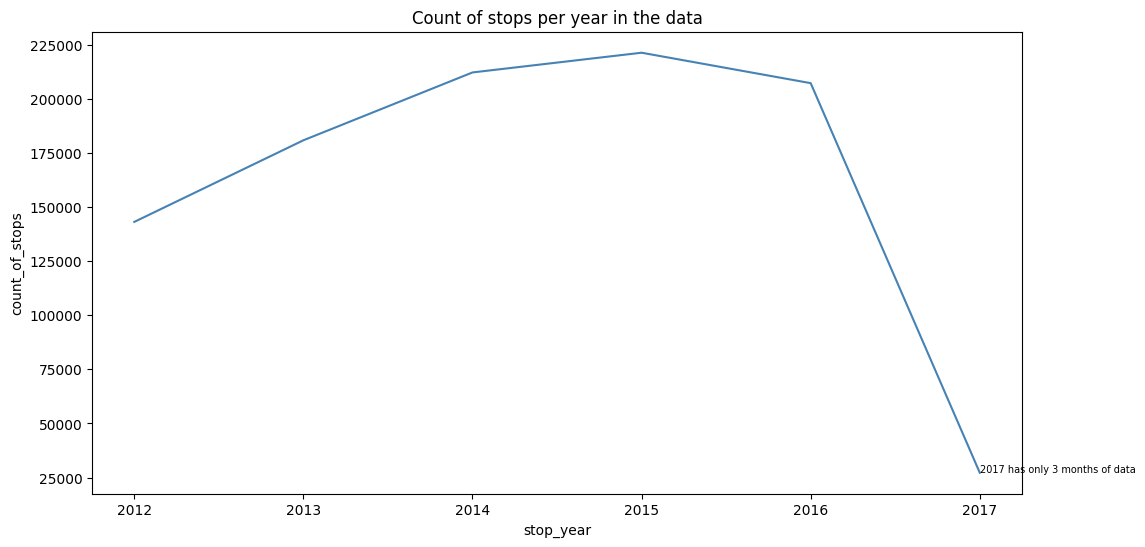

In [118]:
# Reduce the figure size
plt.figure(figsize=(12, 6))

sns.lineplot(data=df_year_trend, x='stop_year', y='count_of_stops', color='steelblue')
plt.title('Count of stops per year in the data')

# Adjust the y-coordinate to place the text below the plot
text_x = df_year_trend['stop_year'].max()  # Position it at the rightmost point on the x-axis
text_y = df_year_trend['count_of_stops'].min()  # Adjust the vertical position as needed

plt.text(text_x, text_y, '2017 has only 3 months of data', fontsize=7, ha='left')

plt.show()


# 11.	Create a vehicle age bucket and identify if there is any correlation between the age and the vehicle type that is likely to be involved in accidents?

In [119]:
df_accident_agebins=df_accident.groupby('vehicle_age_bins')['violation_id'].count().reset_index()\
    .sort_values(by='violation_id', ascending= False).rename({'violation_id':'total_accidents'}, axis= 1)

In [120]:
df_accident_agebins=pd.merge(df_accident_agebins,
                             df.groupby('vehicle_age_bins')['violation_id'].count().reset_index()\
                                .sort_values(by='violation_id', ascending= False).rename({'violation_id':'total_violations'}, axis= 1),
                                how='left',
                                on='vehicle_age_bins')
df_accident_agebins['percent_of_total']= (df_accident_agebins['total_accidents'] / df_accident_agebins['total_violations'])*100

In [121]:
df_accident_agebins

,vehicle_age_bins,total_accidents,total_violations,percent_of_total
0,6-10,7399,314372,2.353581
1,11-15,6257,263471,2.374834
2,0-5,6130,280340,2.186631
3,16-20,2730,106231,2.569871
4,21-30,724,27083,2.673264
5,30+,0,471,0.000000


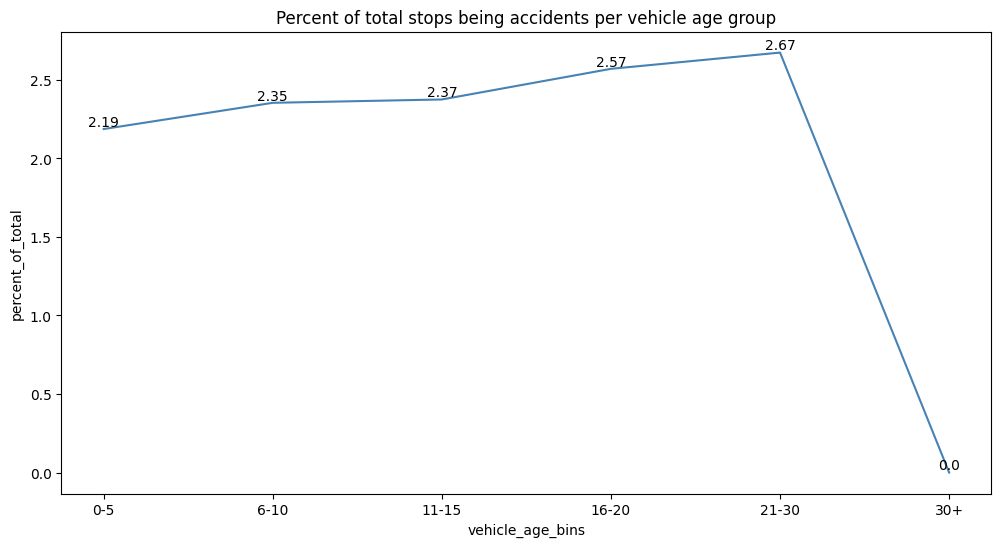

In [122]:
plt.figure(figsize=(12,6))

sns.lineplot(data=df_accident_agebins, x='vehicle_age_bins', y='percent_of_total', color='steelblue')

for index, row in df_accident_agebins.iterrows():
    label=round(row['percent_of_total'], 2)
    plt.text(row['vehicle_age_bins'], row['percent_of_total'], str(label), ha='center', va='bottom')

plt.title('Percent of total stops being accidents per vehicle age group')
plt.show()

# 12.	Identify top cities and their top locations that are likely to be involved in accidents.

In [123]:
df_accident_location=df_accident.groupby('location')['violation_id'].count().reset_index().sort_values(by='violation_id', ascending= False)

In [124]:
top10_list=list(df_accident_location['location'].head(10))
df_accident_location['top_10']=np.where(df_accident_location['location'].isin(top10_list), df_accident_location['location'], 'Other')

In [125]:
df_accident_location.rename({'violation_id':'accident_count'}, axis= 1, inplace= True)

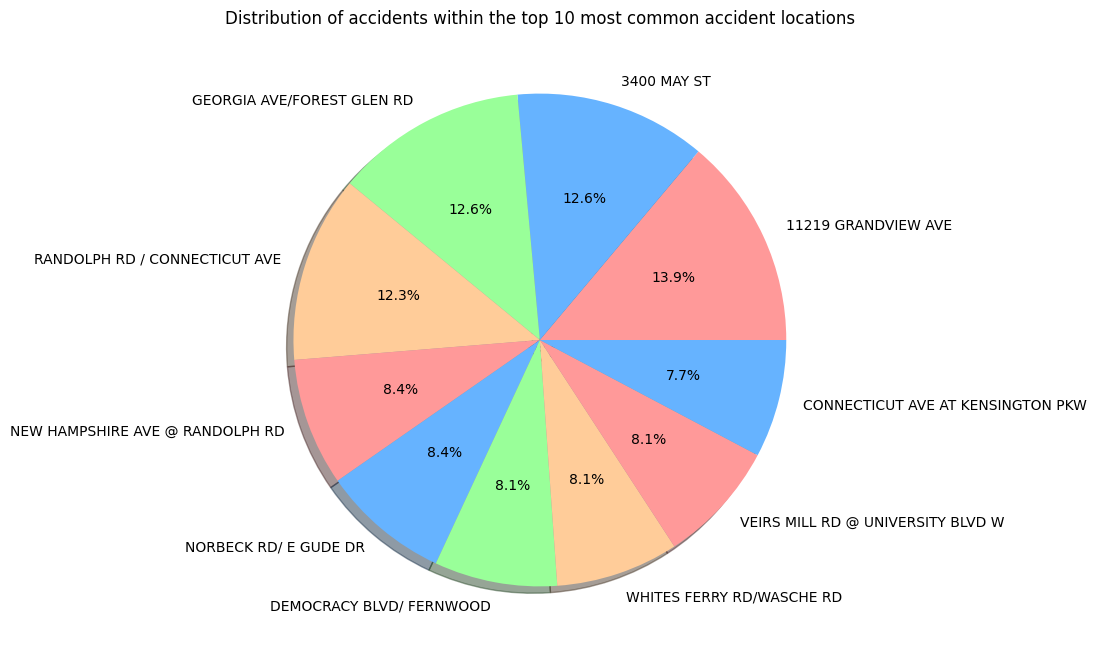

In [126]:
plt.figure(figsize=(8,8))
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
plt.pie(data=df_accident_location[df_accident_location['top_10']!='Other'], x='accident_count', labels='top_10', shadow= True,autopct='%1.1f%%', colors=colors)
plt.title('Distribution of accidents within the top 10 most common accident locations')
plt.show()

In [127]:
df_accident_city=df_accident.groupby('driver_city')['violation_id'].count().reset_index().sort_values(by='violation_id', ascending= False)

In [128]:
top10_city=list(df_accident_city['driver_city'].head(10))
df_accident_city['top_10']=np.where(df_accident_city['driver_city'].isin(top10_city), df_accident_city['driver_city'], 'OTHER')
df_accident_city=df_accident_city.groupby('top_10')['violation_id'].sum().reset_index().rename({'top_10':'driver_city','violation_id':'accident_count'}, axis= 1)
df_accident_city

,driver_city,accident_count
0,BETHESDA,810
1,GAITHERSBURG,2321
2,GERMANTOWN,1576
3,HYATTSVILLE,605
4,MONTGOMERY VILLAGE,622
5,OLNEY,435
6,OTHER,7222
7,POTOMAC,574
8,ROCKVILLE,1999
9,SILVER SPRING,6511


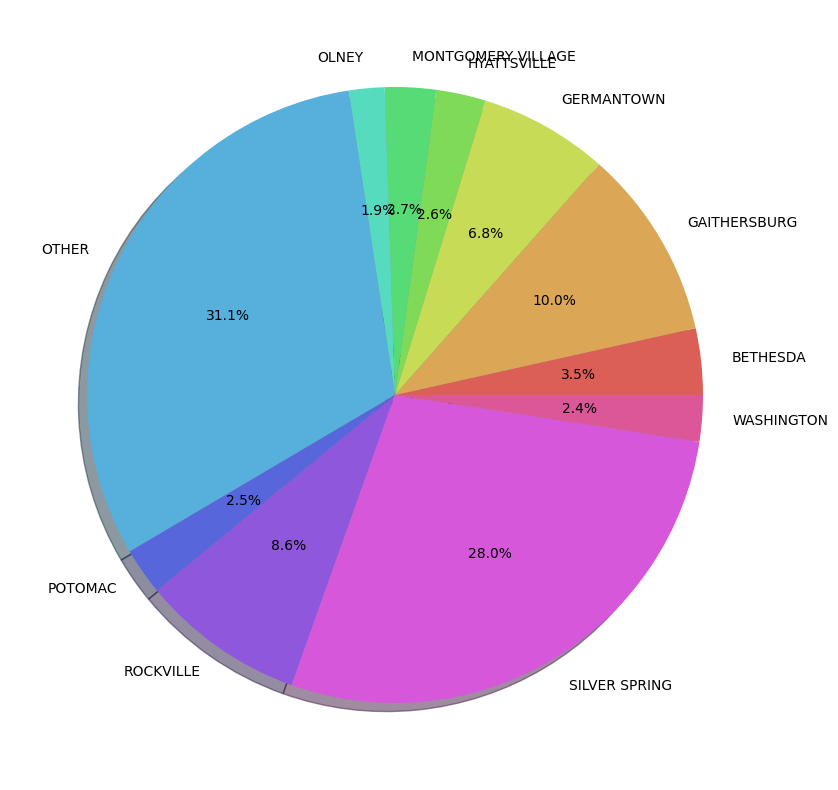

In [129]:

plt.figure(figsize=(10,10))
palette=sns.color_palette('hls', 11)
plt.pie(data=df_accident_city, x='accident_count',\
        labels='driver_city', shadow= True,autopct='%1.1f%%', colors=palette)
#plt.title('Distribution of accidents within the top 10 most common accident locations')
plt.show()